#**Relatório ENEM 2021**

O Exame Nacional do Ensino Médio (ENEM) é uma prova que visa identificar se os participantes da mesma demonstram conhecimentos suficientes nas áreas de ciências, tecnologias modernas e linguagens. Segundo o Inep, o Enem é realizado desde 1998, mas passou por uma reformulação em 2009, assumindo a característica de principal via de acesso ao ensino superior público a partir desse ano.

A abstenção no Enem pode ter diversos motivos, mas em 2021 é possível reconhecer diversos fatores que levaram a alta taxa de faltantes nas provas. Nesse segundo ano de pandemia as abstenções foram maiores que nos últimos 16 anos e os empecilhos da pandemia se mostram determinantes nas causas das faltas.

Meu objetivo com este relatório é a observar quais as caracteristicas dos candidatos que faltaram em uma ou mais provas e suas diferenças entre os candidatos presentes em todas as provas.

##Os dados

- Microdados do Enem 2021

Os microdados do Enem são o menor nível de desagregação de dados recolhidos por meio do exame. Eles atendem a demanda por informações específicas ao disponibilizar as provas, os gabaritos, as informações sobre os itens, as notas e o questionário respondido pelos inscritos no Enem.

Fonte: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

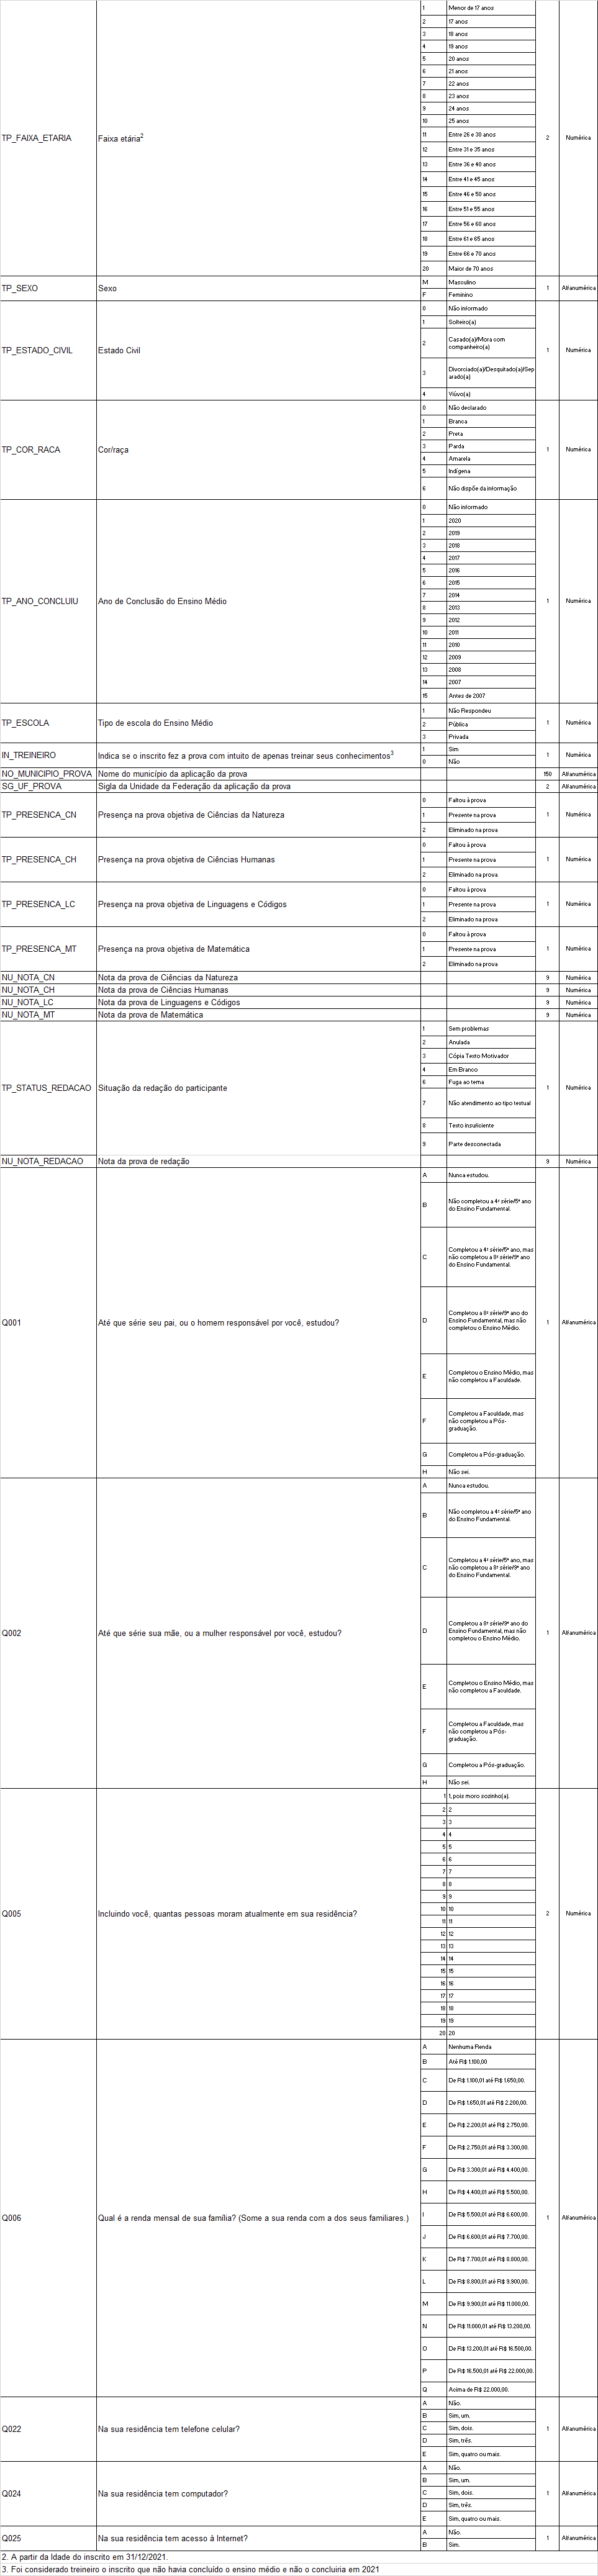

- Malha territorial - Brasil - Unidades da Federação

Geodados com informações sobre as unidades da federação brasileira fornecido pelo Instituto Brasileiro de Geografia e Estatística (IBGE)

Fonte: https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html?=&t=acesso-ao-produto

# Preparando os dados

## Carregando bibliotecas e dados

In [ ]:
! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.2 MB/s 
     |████████████████████████████████| 16.6 MB 41.3 MB/s 
     |████████████████████████████████| 7.8 MB 50.6 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import scipy.stats as stats
from scipy.stats import chi2_contingency, mannwhitneyu, ttest_ind
from statsmodels.stats.proportion import proportions_ztest

sns.set_theme(style="whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
estados = gpd.read_file('drive/MyDrive/Semantix/DADOS/BR_UF_2021.shp')

In [ ]:
dados = pd.read_csv('drive/MyDrive/Semantix/DADOS/MICRODADOS_ENEM_2021.csv', sep=';', encoding="ISO-8859-1")[[
    'TP_FAIXA_ETARIA','TP_SEXO','TP_ESTADO_CIVIL','TP_COR_RACA','TP_ANO_CONCLUIU','TP_ESCOLA','IN_TREINEIRO','NO_MUNICIPIO_PROVA','SG_UF_PROVA','TP_PRESENCA_CN','TP_PRESENCA_CH',
    'TP_PRESENCA_LC','TP_PRESENCA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','TP_STATUS_REDACAO','NU_NOTA_REDACAO','Q001','Q002','Q005','Q006','Q022','Q024','Q025'
    ]]
dados

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,...,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q022,Q024,Q025
0,5,F,1,1,3,1,0,Nova Lima,MG,0,...,NaN,1.0,760.0,F,F,3.0,D,B,B,B
1,12,M,1,1,11,1,0,Maceió,AL,1,...,461.5,1.0,560.0,B,B,3.0,B,C,A,A
2,13,F,3,1,15,1,0,Ferraz de Vasconcelos,SP,0,...,NaN,NaN,NaN,B,C,3.0,C,C,B,B
3,3,M,1,3,0,2,0,Crato,CE,1,...,659.5,1.0,780.0,B,B,6.0,B,B,B,B
4,2,F,1,3,0,2,0,Acarape,CE,1,...,582.6,1.0,780.0,D,E,4.0,C,E,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389827,7,F,1,3,0,1,0,Goiânia,GO,0,...,NaN,NaN,NaN,B,B,5.0,C,B,A,B
3389828,7,F,1,1,5,1,0,Londrina,PR,0,...,NaN,NaN,NaN,E,E,4.0,G,E,B,B
3389829,13,F,1,3,15,1,0,Rio de Janeiro,RJ,0,...,NaN,NaN,NaN,B,C,1.0,F,B,B,B
3389830,7,F,1,1,4,1,0,Pouso Alegre,MG,1,...,706.4,1.0,660.0,E,D,4.0,E,E,C,B


## Pré-processamento dos dados

In [ ]:
dados.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   TP_FAIXA_ETARIA     3389832 non-null  int64  
 1   TP_SEXO             3389832 non-null  object 
 2   TP_ESTADO_CIVIL     3389832 non-null  int64  
 3   TP_COR_RACA         3389832 non-null  int64  
 4   TP_ANO_CONCLUIU     3389832 non-null  int64  
 5   TP_ESCOLA           3389832 non-null  int64  
 6   IN_TREINEIRO        3389832 non-null  int64  
 7   NO_MUNICIPIO_PROVA  3389832 non-null  object 
 8   SG_UF_PROVA         3389832 non-null  object 
 9   TP_PRESENCA_CN      3389832 non-null  int64  
 10  TP_PRESENCA_CH      3389832 non-null  int64  
 11  TP_PRESENCA_LC      3389832 non-null  int64  
 12  TP_PRESENCA_MT      3389832 non-null  int64  
 13  NU_NOTA_CN          2245844 non-null  float64
 14  NU_NOTA_CH          2378379 non-null  float64
 15  NU_NOTA_LC     

In [ ]:
dados.describe().round(2)

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q005
count,3389832.00,3389832.00,3389832.00,3389832.00,3389832.00,3389832.00,3389832.00,3389832.00,3389832.00,3389832.00,2245844.00,2378379.00,2378379.00,2245844.00,2378379.00,2378379.00,3389830.00
mean,5.31,1.05,2.04,2.58,1.40,0.13,0.66,0.70,0.70,0.66,491.79,519.94,502.56,535.08,1.14,613.50,3.74
std,3.90,0.41,1.02,4.28,0.59,0.34,0.47,0.46,0.46,0.47,80.57,95.79,79.16,110.63,0.79,190.71,1.38
min,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
25%,2.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,431.00,445.40,447.60,444.70,1.00,520.00,3.00
50%,4.00,1.00,2.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,482.00,521.90,505.90,515.40,1.00,600.00,4.00
75%,7.00,1.00,3.00,3.00,2.00,0.00,1.00,1.00,1.00,1.00,545.80,589.30,558.80,613.90,1.00,740.00,4.00
max,20.00,4.00,6.00,15.00,3.00,1.00,2.00,2.00,2.00,2.00,867.10,846.90,826.10,953.10,9.00,1000.00,20.00


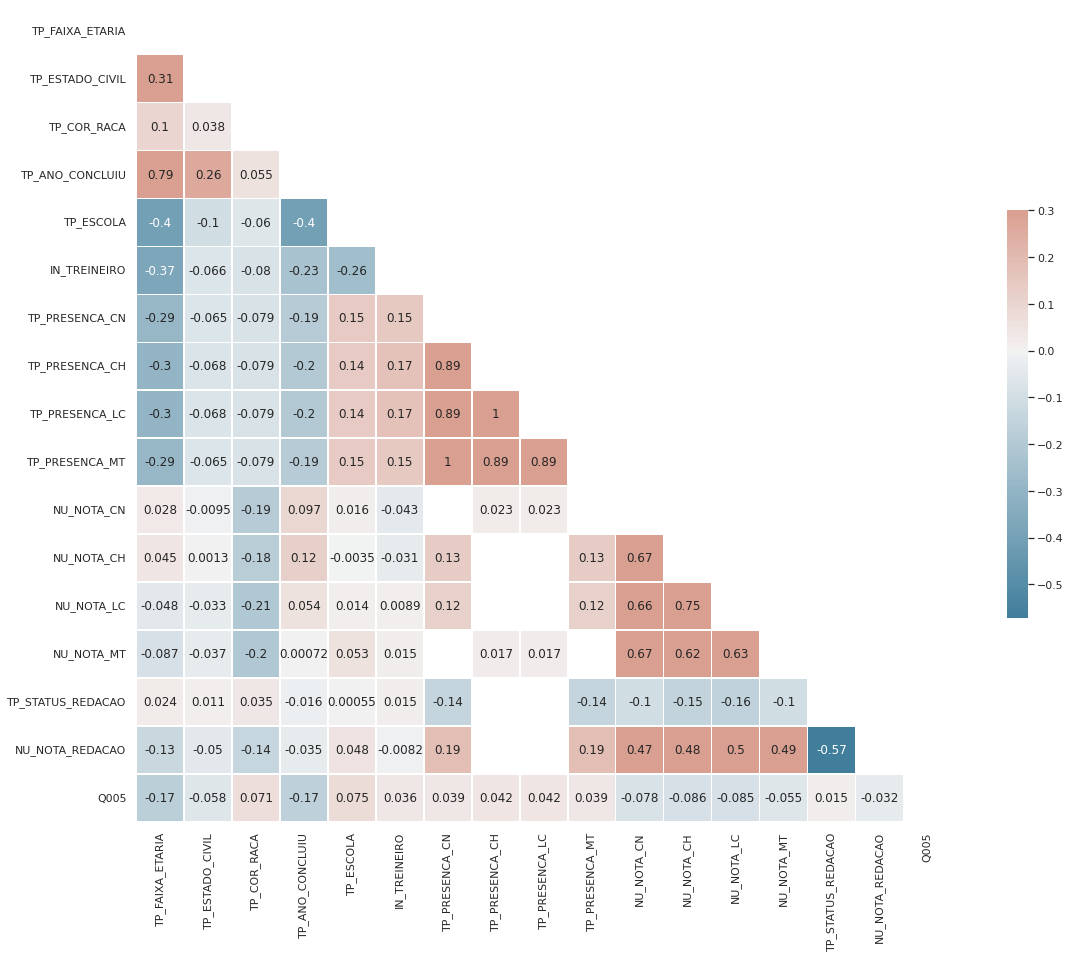

In [ ]:
corr = dados.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Tratamento de dados faltantes

Conseguimos observar alguns dados faltantes em nossa base.

In [ ]:
pd.DataFrame({'Tipo':dados.dtypes, 'Faltando':dados.isna().sum()})

,Tipo,Faltando
TP_FAIXA_ETARIA,int64,0
TP_SEXO,object,0
TP_ESTADO_CIVIL,int64,0
TP_COR_RACA,int64,0
TP_ANO_CONCLUIU,int64,0
TP_ESCOLA,int64,0
IN_TREINEIRO,int64,0
NO_MUNICIPIO_PROVA,object,0
SG_UF_PROVA,object,0
TP_PRESENCA_CN,int64,0


No questionário socioeconomico há apenas 2 registros sem informações, que aparentam ser prováveis casos de perda ou não preenchimento do formulário. Resolvi não tratar essa duas ocorrencias.

In [ ]:
dados[dados.Q025.isna()]

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,...,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q022,Q024,Q025
707314,8,F,1,4,4,1,0,Santo André,SP,1,...,522.5,1.0,520.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3389831,12,F,2,3,15,1,0,Baraúna,RN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


No caso das váriaveis 'TP_STATUS_REDACAO' e 'NU_NOTA_REDACAO' correspondentes à presença e nota da redação, percebi que a categoria 'FALTA/FALTOU' não existe e que todos os registros faltantes estão com situação 'Faltou à prova' ou 'Eliminado na prova' nas provas realizadas no mesmo dia da redação, portanto conclui que os valores NaN são referentes aos alunos que faltaram ou foram eliminados por outros motivos.

In [ ]:
dados[dados.TP_STATUS_REDACAO.isna()]['TP_PRESENCA_LC'].value_counts()

0    1007397
2       4056
Name: TP_PRESENCA_LC, dtype: int64

Para contabilizar melhor registrei uma nova categoria '0' na váriavel 'TP_STATUS_REDACAO' e atribui a todos os alunos com valores NaN na mesma variável, organizando o grupo dos candidatos que faltaram na redação.

In [ ]:
falta_cn = dados['TP_PRESENCA_CN'] != 1
falta_mt = dados['TP_PRESENCA_MT'] != 1
falta_ch = dados['TP_PRESENCA_CH'] != 1
falta_lc = dados['TP_PRESENCA_LC'] != 1

falta_redacao = dados['TP_STATUS_REDACAO'].isnull()
dados['TP_STATUS_REDACAO'] = dados['TP_STATUS_REDACAO'].fillna(0)

pd.DataFrame({'para faltantes + eliminados nas provas do 1º dia': [dados[falta_redacao].shape[0] - dados[falta_ch].shape[0]]}, index=['Diferença Redação NaN'])

,para faltantes + eliminados nas provas do 1º dia
Diferença Redação NaN,0


No caso das notas das provas é possível verificar que os valores faltantes apenas occorem quando a presença na mesma prova é 'Faltou à prova' ou 'Eliminado na prova'.

In [ ]:
dados[dados['NU_NOTA_CN'].isna()][['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','TP_STATUS_REDACAO','NU_NOTA_REDACAO']]

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,0,1,1,0,NaN,574.6,472.6,NaN,1.0,760.0
2,0,0,0,0,NaN,NaN,NaN,NaN,0.0,NaN
5,0,0,0,0,NaN,NaN,NaN,NaN,0.0,NaN
6,0,1,1,0,NaN,511.9,420.4,NaN,1.0,480.0
7,0,0,0,0,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
3389826,0,0,0,0,NaN,NaN,NaN,NaN,0.0,NaN
3389827,0,0,0,0,NaN,NaN,NaN,NaN,0.0,NaN
3389828,0,0,0,0,NaN,NaN,NaN,NaN,0.0,NaN
3389829,0,0,0,0,NaN,NaN,NaN,NaN,0.0,NaN


Resolvi não alterar a própriva variável pois existem diversos registros com presença e notas 0 na mesma prova.

In [ ]:
dados.query('TP_PRESENCA_CN == 1')['NU_NOTA_CN'].value_counts().sort_index()

0.0      393
307.6      1
307.7      1
308.3      1
308.5      1
        ... 
854.3      1
856.2      5
856.6     16
858.8      1
867.1      5
Name: NU_NOTA_CN, Length: 5030, dtype: int64

### Adicionando novas variáveis

#### Faltas

Para ter um melhor controle sobre quem faltou criei 4 novas variáveis:
- 'BOL_FALTA_1' : candidatos que faltaram no primeiro dia
- 'BOL_FALTA_2' : candidatos que faltaram no segundo dia
- 'BOL_FALTA_QUALQUER' : candidatos que faltaram, independente do dia
- 'BOL_FALTA_AMBOS' : candidatos que faltaram nos dois dias

In [ ]:
falta_dia_1 = falta_ch & falta_lc
falta_dia_2 = falta_cn & falta_mt
falta_dia_ambos = falta_dia_1 & falta_dia_2
falta_dia_qualquer = falta_cn | falta_mt | falta_ch | falta_lc

dados['BOL_FALTA_1'] = falta_dia_1.values
dados['BOL_FALTA_2'] = falta_dia_2.values
dados['BOL_FALTA_QUALQUER'] = falta_dia_qualquer.values
dados['BOL_FALTA_AMBOS'] = falta_dia_ambos.values
dados[['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT',
       'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','TP_STATUS_REDACAO','NU_NOTA_REDACAO',
       'BOL_FALTA_1','BOL_FALTA_2','BOL_FALTA_QUALQUER','BOL_FALTA_AMBOS']].head()

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,BOL_FALTA_1,BOL_FALTA_2,BOL_FALTA_QUALQUER,BOL_FALTA_AMBOS
0,0,1,1,0,NaN,574.6,472.6,NaN,1.0,760.0,False,True,True,False
1,1,1,1,1,505.9,551.8,498.3,461.5,1.0,560.0,False,False,False,False
2,0,0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,True,True,True,True
3,1,1,1,1,580.7,678.9,638.9,659.5,1.0,780.0,False,False,False,False
4,1,1,1,1,497.7,532.4,457.6,582.6,1.0,780.0,False,False,False,False


#### Notas Médias

Adicionando as novas colunas 'NOTA_MEDIA_DIA_1' e 'NOTA_MEDIA_DIA_2' com a média das notas das provas dos respectivos dias.
<br>Atribuido valor de 0.00 aos candidatos que não fizeram as provas.

In [ ]:
dados['NOTA_MEDIA_DIA_1'] = dados[['NU_NOTA_CH', 'NU_NOTA_LC']].mean(axis=1)
dados['NOTA_MEDIA_DIA_1'] = dados['NOTA_MEDIA_DIA_1'].fillna(0)
dados['NOTA_MEDIA_DIA_2'] = dados[['NU_NOTA_CN', 'NU_NOTA_MT']].mean(axis=1)
dados['NOTA_MEDIA_DIA_2'] = dados['NOTA_MEDIA_DIA_2'].fillna(0)

dados[['BOL_FALTA_1','BOL_FALTA_2','BOL_FALTA_QUALQUER','BOL_FALTA_AMBOS','NU_NOTA_CN','NU_NOTA_CH',
       'NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','NOTA_MEDIA_DIA_1','NOTA_MEDIA_DIA_2']].head()

,BOL_FALTA_1,BOL_FALTA_2,BOL_FALTA_QUALQUER,BOL_FALTA_AMBOS,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_MEDIA_DIA_1,NOTA_MEDIA_DIA_2
0,False,True,True,False,NaN,574.6,472.6,NaN,760.0,523.60,0.00
1,False,False,False,False,505.9,551.8,498.3,461.5,560.0,525.05,483.70
2,True,True,True,True,NaN,NaN,NaN,NaN,NaN,0.00,0.00
3,False,False,False,False,580.7,678.9,638.9,659.5,780.0,658.90,620.10
4,False,False,False,False,497.7,532.4,457.6,582.6,780.0,495.00,540.15


Conseguimos observar
- Todas as provas contem candidatos presentes com respostas válidas que tiraram nota 0.
- No segundo dia de prova teve um declínio em pouco mais de 5% no número de candidatos que realizaram a prova.

In [ ]:
dados.query('BOL_FALTA_1 == False')[['NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','NOTA_MEDIA_DIA_1']].describe().round(2)

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NOTA_MEDIA_DIA_1
count,2378379.00,2378379.00,2378379.00,2378379.00
mean,519.94,502.56,613.50,511.25
std,95.79,79.16,190.71,81.90
min,0.00,0.00,0.00,0.00
25%,445.40,447.60,520.00,448.45
50%,521.90,505.90,600.00,509.35
75%,589.30,558.80,740.00,570.50
max,846.90,826.10,1000.00,827.05


In [ ]:
dados.query('BOL_FALTA_2 == False')[['NU_NOTA_CN','NU_NOTA_MT','NOTA_MEDIA_DIA_2']].describe().round(2)

,NU_NOTA_CN,NU_NOTA_MT,NOTA_MEDIA_DIA_2
count,2245844.00,2245844.00,2245844.00
mean,491.79,535.08,513.43
std,80.57,110.63,87.54
min,0.00,0.00,0.00
25%,431.00,444.70,445.75
50%,482.00,515.40,496.00
75%,545.80,613.90,569.05
max,867.10,953.10,907.95


#### GEOdados

Criando DataFrame separado para as informaçoes da localização de realização da prova, frequência e provas.

In [ ]:
uf = []
taxa_frequencia = []
prova1 = []
prova2 = []
reda = []

for est in dados['SG_UF_PROVA'].unique():
  uf.append(est)
  taxa_frequencia.append(dados.query('SG_UF_PROVA == "'+ est +'"')['BOL_FALTA_QUALQUER'].value_counts().sort_index()[1] / dados.query('SG_UF_PROVA == "'+ est +'"').shape[0])
  prova1.append(dados.query('BOL_FALTA_1 == False & SG_UF_PROVA == "'+ est +'"')['NOTA_MEDIA_DIA_1'].mean())
  prova2.append(dados.query('BOL_FALTA_2 == False & SG_UF_PROVA == "'+ est +'"')['NOTA_MEDIA_DIA_2'].mean())
  reda.append(dados.query('BOL_FALTA_1 == False & SG_UF_PROVA == "'+ est +'"')['NOTA_MEDIA_DIA_2'].mean())

dados_geo = pd.DataFrame({'uf':uf,'taxa_frequencia':taxa_frequencia,'prova1':prova1,'prova2':prova2,'redacao':reda})

dados_geo_f = estados.merge(dados_geo, right_on='uf', left_on='SIGLA')

dados_geo_f.head(3)

,CD_UF,NM_UF,SIGLA,NM_REGIAO,geometry,uf,taxa_frequencia,prova1,prova2,redacao
0,11,Rondônia,RO,Norte,"POLYGON ((-62.86662 -7.97587, -62.86017 -7.982...",RO,0.429773,488.739917,490.932485,446.208071
1,12,Acre,AC,Norte,"POLYGON ((-73.16550 -7.34166, -73.05480 -7.381...",AC,0.374607,490.232756,482.693545,446.128523
2,13,Amazonas,AM,Norte,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125...",AM,0.503665,475.370034,473.266750,423.505842


# Análise exploratória

## Olhando para a frequência de realização da prova

Em média 30% dos alunos faltaram em cada prova, com leve aumento no segundo dia de prova.<br>
<b>Vejamos se na redação acontece o mesmo comportamento.</b>

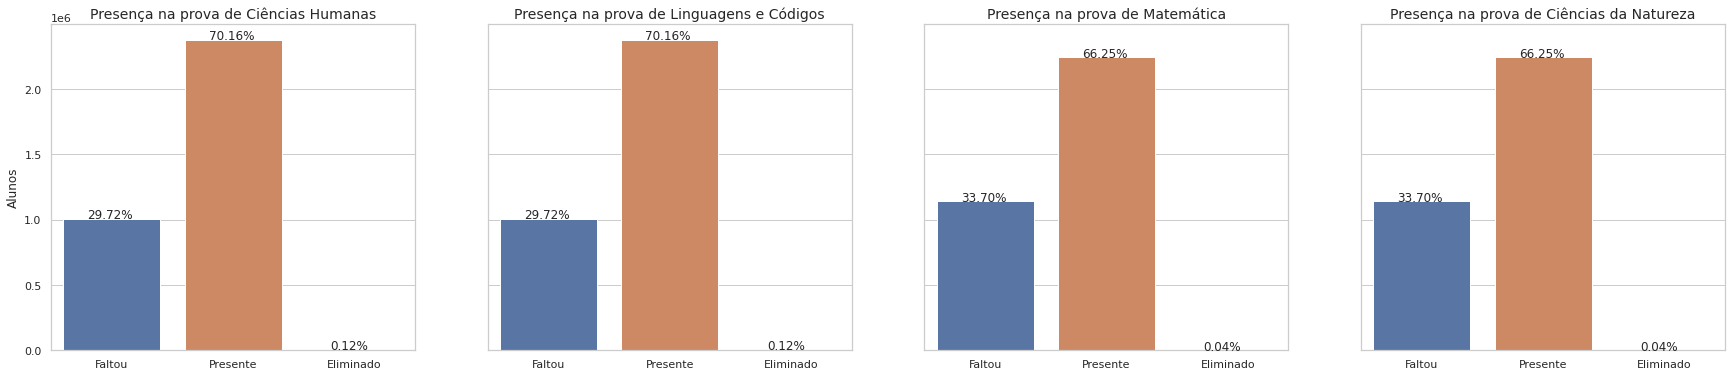

In [ ]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, sharey=True, figsize=(30,6))

sns.countplot(data=dados, x='TP_PRESENCA_CH', ax=ax0)
ax0.set_title('Presença na prova de Ciências Humanas', fontsize=14)
ax0.set_xlabel('')
ax0.set_ylabel('Alunos')
ax0.set_xticks(np.arange(3))
ax0.set_xticklabels(['Faltou', 'Presente', 'Eliminado'])
for p, label in zip(ax0.patches, dados["TP_PRESENCA_CH"].value_counts(normalize=True).sort_index().values):
    ax0.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.2, p.get_height()+0.2))

sns.countplot(data=dados, x='TP_PRESENCA_LC', ax=ax1)
ax1.set_title('Presença na prova de Linguagens e Códigos', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticks(np.arange(3))
ax1.set_xticklabels(['Faltou', 'Presente', 'Eliminado'])
for p, label in zip(ax1.patches, dados["TP_PRESENCA_LC"].value_counts(normalize=True).sort_index().values):
    ax1.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.2, p.get_height()+0.2))

sns.countplot(data=dados, x='TP_PRESENCA_MT', ax=ax2)
ax2.set_title('Presença na prova de Matemática', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticks(np.arange(3))
ax2.set_xticklabels(['Faltou', 'Presente', 'Eliminado'])
for p, label in zip(ax2.patches, dados["TP_PRESENCA_MT"].value_counts(normalize=True, sort=False).values):
    ax2.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.2, p.get_height()+0.2))
    
sns.countplot(data=dados, x='TP_PRESENCA_CN', ax=ax3)
ax3.set_title('Presença na prova de Ciências da Natureza', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.set_xticks(np.arange(3))
ax3.set_xticklabels(['Faltou', 'Presente', 'Eliminado'])
for p, label in zip(ax3.patches, dados["TP_PRESENCA_CN"].value_counts(normalize=True, sort=False).values):
    ax3.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.2, p.get_height()+0.2))

plt.show()

Observamos na redação comportamento identico às provas do 1º dia, dia de sua realização.

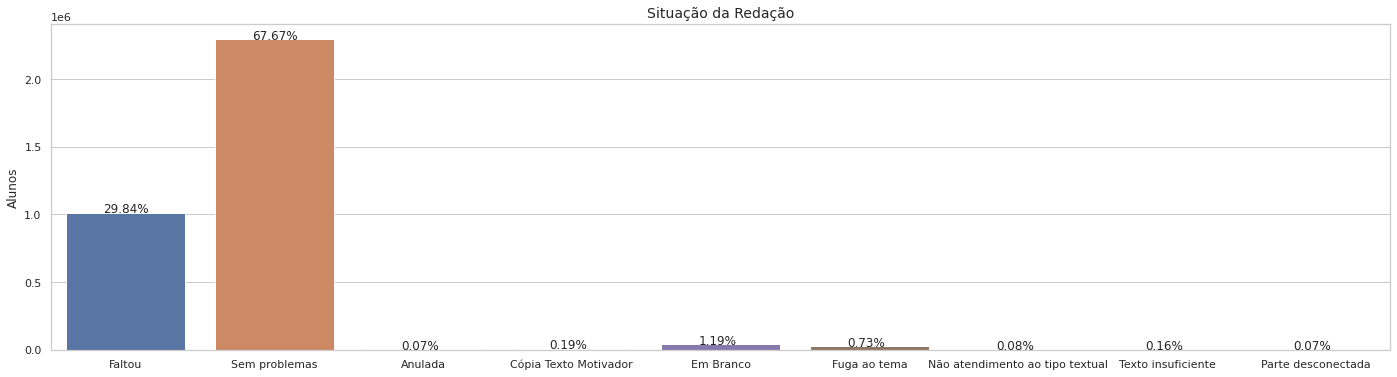

In [ ]:
fig, ax = plt.subplots(figsize=(24,6))

ax = sns.countplot(data=dados, x='TP_STATUS_REDACAO')
ax.set_title('Situação da Redação', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Alunos')
ax.set_xticks(np.arange(9))
ax.set_xticklabels(['Faltou', 'Sem problemas', 'Anulada', 'Cópia Texto Motivador', 'Em Branco', 'Fuga ao tema', 'Não atendimento ao tipo textual', 'Texto insuficiente', 'Parte desconectada'])
for p, label in zip(ax.patches, dados["TP_STATUS_REDACAO"].value_counts(normalize=True).sort_index().values):
    ax.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.25, p.get_height()+0.2))

plt.show()

Conseguimos observar que o dia com mais evasão foi o 2º, seguido pelo primeiro e depois pelo grupo de pessoas que faltaram os dois dias.<br>
- Os faltantes da Redação e do 1º dia são identicos.
- Os candidatos que faltaram em apenas um dos dias representa apenas 12,85% dos que faltaram.<br>
- Enquanto os candidatos que faltaram em qualquer prova representa 33,97% da totalidade de registros na base de dados.

In [ ]:
provas_por_dia = {
    '1º Dia': [dados[falta_dia_1].shape[0]],
    '2º Dia': [dados[falta_dia_2].shape[0]],
    'Apenas 1 dia': [dados[falta_dia_1 ^ falta_dia_2].shape[0]],
    'Ambos os dias': [dados[falta_dia_ambos].shape[0]],
    'Qualquer dia': [dados[falta_dia_qualquer].shape[0]],
    'Redação': [dados[falta_redacao].shape[0]]
}
pd.DataFrame(provas_por_dia, index=['Faltas + Eliminações'])

,1º Dia,2º Dia,Apenas 1 dia,Ambos os dias,Qualquer dia,Redação
Faltas + Eliminações,1011453,1143988,148009,1003716,1151725,1011453


## Comparando alunos presentes com alunos faltantes

### Dados dos Participantes

É notável a maior proporção de pessoas de idade mais avançada entre o grupo que faltou.
- 75% dos alunos presentes em todas as provas entre 18 e 21 anos
- 75% dos que faltaram entre 19 e 31 à 35 anos

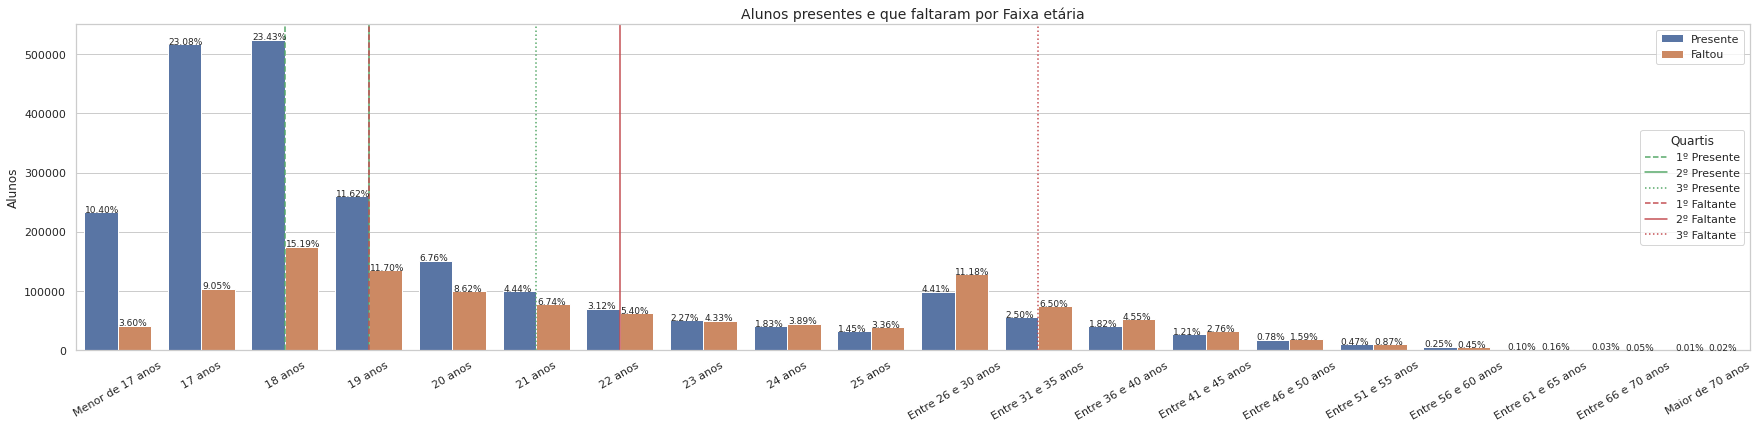

In [ ]:
labels = ['Menor de 17 anos', '17 anos', '18 anos', '19 anos', '20 anos', '21 anos', '22 anos', '23 anos', '24 anos', '25 anos', 'Entre 26 e 30 anos', 'Entre 31 e 35 anos',
          'Entre 36 e 40 anos', 'Entre 41 e 45 anos', 'Entre 46 e 50 anos', 'Entre 51 e 55 anos', 'Entre 56 e 60 anos', 'Entre 61 e 65 anos', 'Entre 66 e 70 anos', 'Maior de 70 anos']

fig, ax = plt.subplots(figsize=(30,6))

ax = sns.countplot(data=dados, x='TP_FAIXA_ETARIA', hue='BOL_FALTA_QUALQUER')
ax.set_title('Alunos presentes e que faltaram por Faixa etária', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Alunos')
ax.set_xticks(np.arange(20))
ax.set_xticklabels(labels, rotation=30)
for p, label in zip(ax.patches, dados.groupby(['BOL_FALTA_QUALQUER'])["TP_FAIXA_ETARIA"].value_counts(normalize=True).sort_index().values):
    ax.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.01, p.get_height()+0.2), fontsize=9)
    
legenda = plt.legend(title='', loc='upper right', labels=['Presente', 'Faltou'])
ax.add_artist(legenda)

ax.axvline(dados.query('BOL_FALTA_QUALQUER == False')['TP_FAIXA_ETARIA'].quantile(.25), color='g', linestyle='--')
ax.axvline(dados.query('BOL_FALTA_QUALQUER == False')['TP_FAIXA_ETARIA'].quantile(.5), color='g', linestyle='-')
ax.axvline(dados.query('BOL_FALTA_QUALQUER == False')['TP_FAIXA_ETARIA'].quantile(.75), color='g', linestyle=':')
ax.axvline(dados.query('BOL_FALTA_QUALQUER == True')['TP_FAIXA_ETARIA'].quantile(.25), color='r', linestyle='--')
ax.axvline(dados.query('BOL_FALTA_QUALQUER == True')['TP_FAIXA_ETARIA'].quantile(.5), color='r', linestyle='-')
ax.axvline(dados.query('BOL_FALTA_QUALQUER == True')['TP_FAIXA_ETARIA'].quantile(.75), color='r', linestyle=':')
plt.legend(title='Quartis', loc='center right', labels=['1º Presente','2º Presente','3º Presente',
                                                        '1º Faltante','2º Faltante','3º Faltante'])

plt.show()

Também é possível notar uma leve tendência a candidatos não-brancos entre os que faltaram.

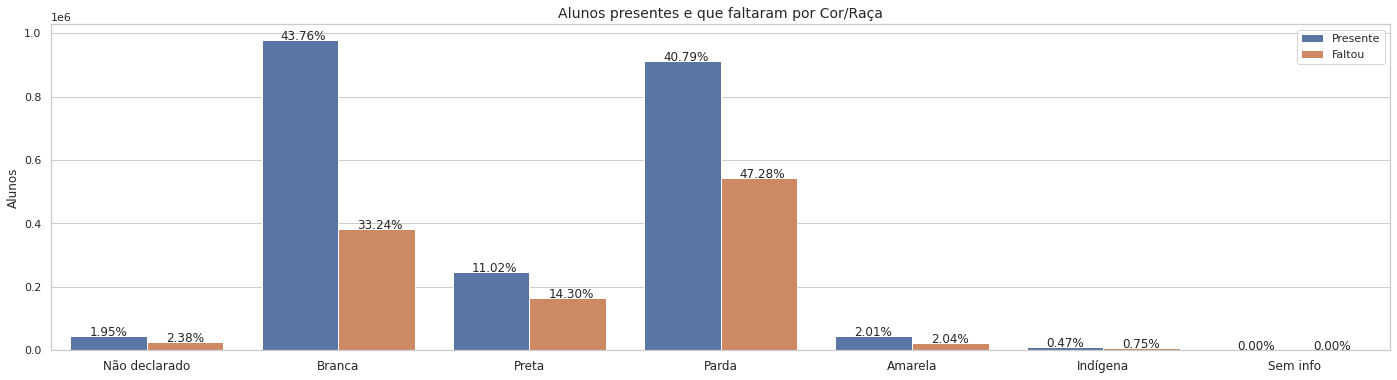

In [ ]:
labels = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Sem info']

fig, ax = plt.subplots(figsize=(24,6))

ax = sns.countplot(data=dados, x='TP_COR_RACA', hue='BOL_FALTA_QUALQUER')
ax.set_title('Alunos presentes e que faltaram por Cor/Raça',fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Alunos')
ax.set_xticks(np.arange(7))
ax.set_xticklabels(labels, fontsize=12)
for p, label in zip(ax.patches, dados.groupby(['BOL_FALTA_QUALQUER'])["TP_COR_RACA"].value_counts(normalize=True).sort_index().values):
    ax.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.1, p.get_height()+0.3), fontsize=12)
    
plt.legend(title='', loc='upper right', labels=['Presente', 'Faltou'])
plt.show()

Entre os candidatos que já concluiram o Ensino Médio, os que faltaram em alguma prova são proporcionalmente maior do ano de 2019 até antes de 2007.
- 75% dos candidatos presentes em todas as provas, e que informaram o ano de conclusão do Ensino Médio, concluiram entre os anos de 2020 e 2014.
- 75% dos que não estavam presentes, e que informaram o ano de conclusão do Ensino Médio, concluiram entre 2019 e 2011.

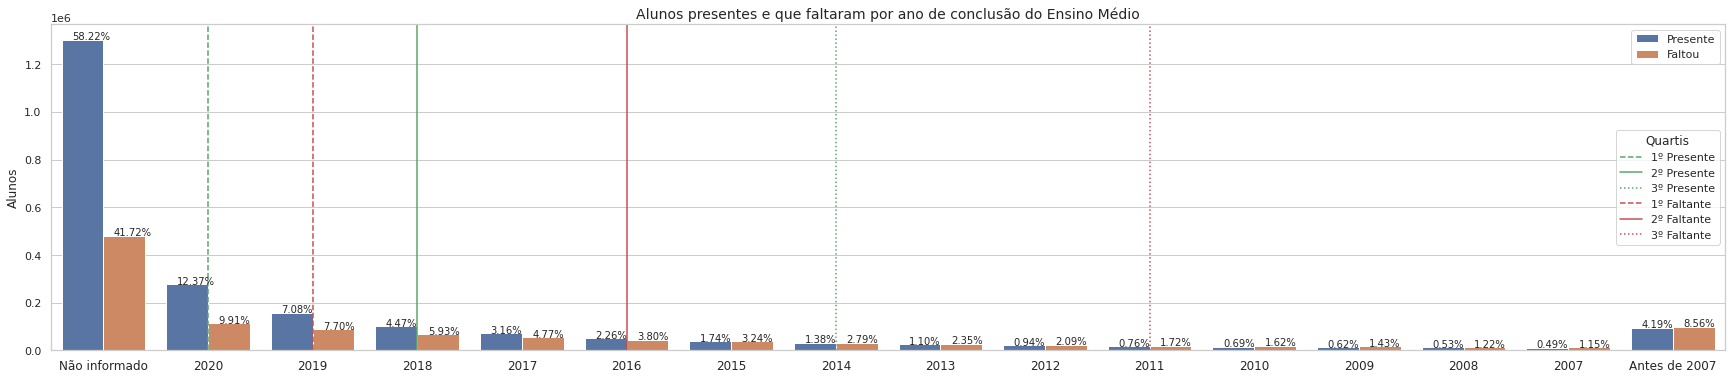

In [ ]:
labels = ['Não informado','2020','2019','2018','2017','2016','2015','2014',
          '2013','2012','2011','2010','2009','2008','2007','Antes de 2007']

fig, ax = plt.subplots(figsize=(30,6))

ax = sns.countplot(data=dados, x='TP_ANO_CONCLUIU', hue='BOL_FALTA_QUALQUER')
ax.set_title('Alunos presentes e que faltaram por ano de conclusão do Ensino Médio', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Alunos')
ax.set_xticks(np.arange(16))
ax.set_xticklabels(labels, fontsize=12)
for p, label in zip(ax.patches, dados.groupby(['BOL_FALTA_QUALQUER'])["TP_ANO_CONCLUIU"].value_counts(normalize=True).sort_index().values):
    ax.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.1, p.get_height()+0.3), fontsize=10)
    
legenda = plt.legend(title='', loc='upper right', labels=['Presente', 'Faltou'])
ax.add_artist(legenda)

ax.axvline(dados.query('BOL_FALTA_QUALQUER == False & TP_ANO_CONCLUIU != 0')['TP_ANO_CONCLUIU'].quantile(.25), color='g', linestyle='--')
ax.axvline(dados.query('BOL_FALTA_QUALQUER == False & TP_ANO_CONCLUIU != 0')['TP_ANO_CONCLUIU'].quantile(.5), color='g', linestyle='-')
ax.axvline(dados.query('BOL_FALTA_QUALQUER == False & TP_ANO_CONCLUIU != 0')['TP_ANO_CONCLUIU'].quantile(.75), color='g', linestyle=':')
ax.axvline(dados.query('BOL_FALTA_QUALQUER == True & TP_ANO_CONCLUIU != 0')['TP_ANO_CONCLUIU'].quantile(.25), color='r', linestyle='--')
ax.axvline(dados.query('BOL_FALTA_QUALQUER == True & TP_ANO_CONCLUIU != 0')['TP_ANO_CONCLUIU'].quantile(.5), color='r', linestyle='-')
ax.axvline(dados.query('BOL_FALTA_QUALQUER == True & TP_ANO_CONCLUIU != 0')['TP_ANO_CONCLUIU'].quantile(.75), color='r', linestyle=':')
plt.legend(title='Quartis', loc='center right', labels=['1º Presente','2º Presente','3º Presente',
                                                        '1º Faltante','2º Faltante','3º Faltante'])
plt.show()

Apenas 1,12% dos alunos que faltaram em alguma prova estudaram em escola privada durante o Ensino Médio, contra 8,01% dos presentes em todas as provas.

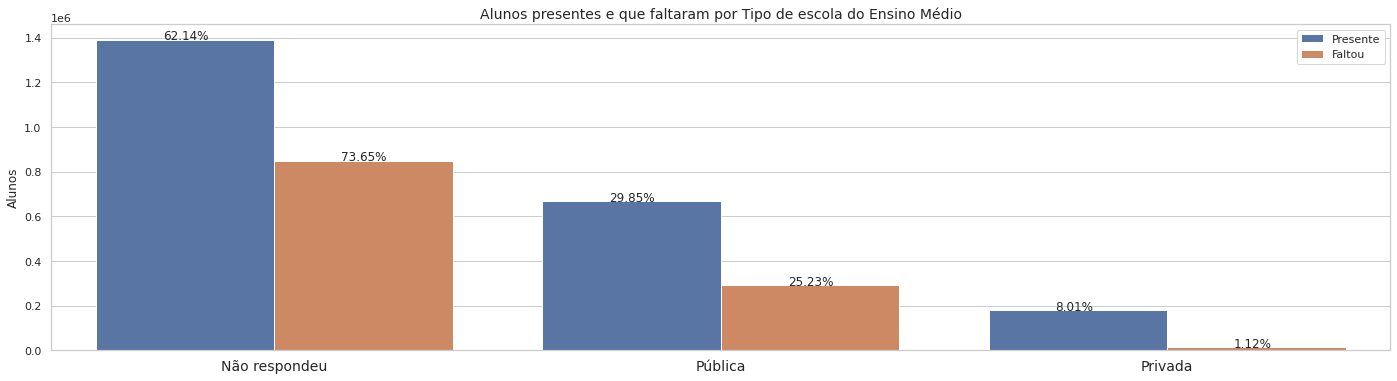

In [ ]:
labels = ['Não respondeu','Pública','Privada']

fig, ax = plt.subplots(figsize=(24,6))

ax = sns.countplot(data=dados, x='TP_ESCOLA', hue='BOL_FALTA_QUALQUER')
ax.set_title('Alunos presentes e que faltaram por Tipo de escola do Ensino Médio', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Alunos')
ax.set_xticks(np.arange(3))
ax.set_xticklabels(labels, fontsize=14)
for p, label in zip(ax.patches, dados.groupby(['BOL_FALTA_QUALQUER'])["TP_ESCOLA"].value_counts(normalize=True).sort_index().values):
    ax.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.15, p.get_height()+0.3), fontsize=12)
    
plt.legend(title='', loc='upper right', labels=['Presente', 'Faltou'])

plt.show()

- <i>Aqui vale ressaltar que foi considerado treineiro o inscrito que não havia concluido o ensino médio e não o concluiria em 2021.</i><br>
É possível observar que proporcionalmente os candidatos que faltaram em alguma prova tem uma tendência em estar fazendo o Enem valendo.<br>**Isso provavelmente é influenciado pelo método de seleção de quem é treineiro ou não, já que parece incluir apenas estudantes do ensino médio.**

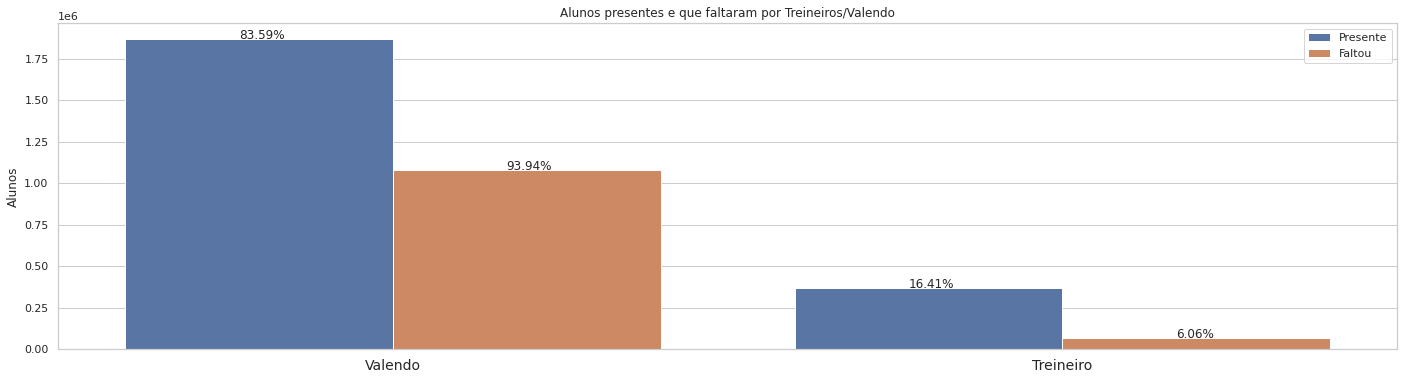

In [ ]:
labels = ['Valendo', 'Treineiro']

fig, ax = plt.subplots(figsize=(24,6))

ax = sns.countplot(data=dados, x='IN_TREINEIRO', hue='BOL_FALTA_QUALQUER')
ax.set_title('Alunos presentes e que faltaram por Treineiros/Valendo')
ax.set_xlabel('')
ax.set_ylabel('Alunos')
ax.set_xticks(np.arange(2))
ax.set_xticklabels(labels, fontsize=14)
for p, label in zip(ax.patches, dados.groupby(['BOL_FALTA_QUALQUER'])["IN_TREINEIRO"].value_counts(normalize=True).sort_index().values):
    ax.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.17, p.get_height()+0.3), fontsize=12)
    
plt.legend(title='', loc='upper right', labels=['Presente', 'Faltou'])
plt.show()

### Dados do local de aplicação da prova 

Quando olhamos essa comparação por Estados notamos uma leve tendencia para os alunos que faltaram nos estados na Região Norte.

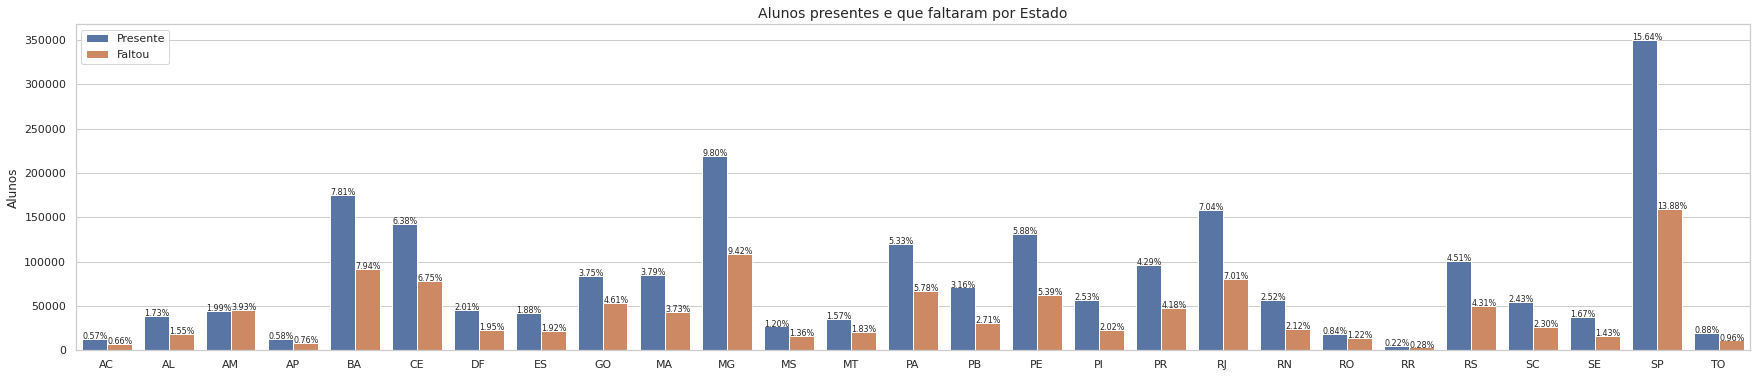

In [ ]:
fig, ax = plt.subplots(figsize=(30,6))

ax = sns.countplot(data=dados, x='SG_UF_PROVA', hue='BOL_FALTA_QUALQUER', order=dados["SG_UF_PROVA"].value_counts().sort_index().index)
ax.set_title('Alunos presentes e que faltaram por Estado', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Alunos')
for p, label in zip(ax.patches, dados.groupby(['BOL_FALTA_QUALQUER'])["SG_UF_PROVA"].value_counts(normalize=True).sort_index().values):
    ax.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.01, p.get_height()+0.3), fontsize=8) 
    
plt.legend(title='', loc='upper left', labels=['Presente', 'Faltou'])
plt.show()

No mapa de calor podemos observar melhor que:
- O estado do Amazonas é a unidade da federação com maior indice de faltas.
- A região centro-oeste também apresenta maior abstenção proporcionalmente comparada com outras regiões.

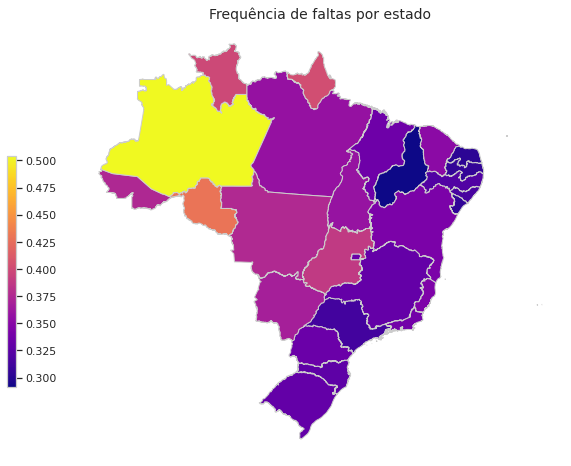

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.axis('off')
dados_geo_f.plot(column='taxa_frequencia', ax=ax, edgecolor='0.8', linewidth=1, cmap='plasma')
ax.set_title('Frequência de faltas por estado', fontsize=14)
            
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=dados_geo_f['taxa_frequencia'].min(), vmax=dados_geo_f['taxa_frequencia'].max()), cmap='plasma')
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

### Dados da Prova Objetiva

Candidatos que faltaram no 2º dia tiveram notas visivelmente piores que os alunos que compareceram em todas as provas.

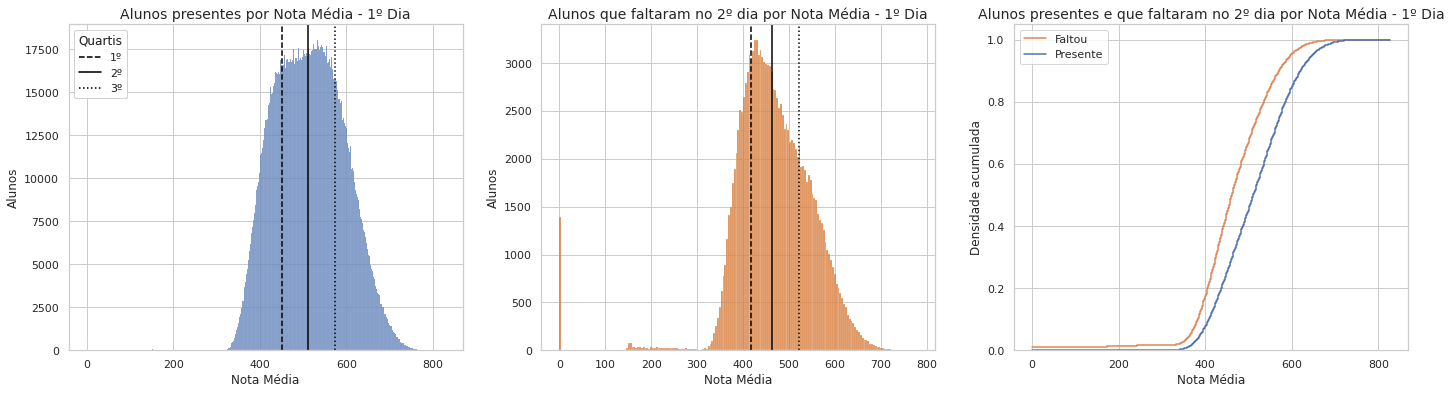

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, sharey=False, figsize=(24,6))

sns.histplot(data=dados.query('BOL_FALTA_QUALQUER == False'), x='NOTA_MEDIA_DIA_1', ax=ax0)
ax0.set_title('Alunos presentes por Nota Média - 1º Dia', fontsize=14)
ax0.set_xlabel('Nota Média')
ax0.set_ylabel('Alunos')

sns.histplot(data=dados.query('BOL_FALTA_1 == False & BOL_FALTA_2 == True'), x='NOTA_MEDIA_DIA_1', color='chocolate', ax=ax1)
ax1.set_title('Alunos que faltaram no 2º dia por Nota Média - 1º Dia', fontsize=14)
ax1.set_xlabel('Nota Média')
ax1.set_ylabel('Alunos')

sns.histplot(data=dados.query('BOL_FALTA_1 == False'), x="NOTA_MEDIA_DIA_1", hue="BOL_FALTA_2",
             element="step", fill=False, cumulative=True, stat="density", common_norm=False, ax=ax2)
ax2.set_title('Alunos presentes e que faltaram no 2º dia por Nota Média - 1º Dia', fontsize=14)
ax2.set_xlabel('Nota Média')
ax2.set_ylabel('Densidade acumulada')


ax0.axvline(dados.query('BOL_FALTA_QUALQUER == False')['NOTA_MEDIA_DIA_1'].quantile(.25), color='black', linestyle='--')
ax0.axvline(dados.query('BOL_FALTA_QUALQUER == False')['NOTA_MEDIA_DIA_1'].quantile(.5), color='black', linestyle='-')
ax0.axvline(dados.query('BOL_FALTA_QUALQUER == False')['NOTA_MEDIA_DIA_1'].quantile(.75), color='black', linestyle=':')

ax1.axvline(dados.query('BOL_FALTA_1 == False & BOL_FALTA_2 == True')['NOTA_MEDIA_DIA_1'].quantile(.25), color='black', linestyle='--')
ax1.axvline(dados.query('BOL_FALTA_1 == False & BOL_FALTA_2 == True')['NOTA_MEDIA_DIA_1'].quantile(.5), color='black', linestyle='-')
ax1.axvline(dados.query('BOL_FALTA_1 == False & BOL_FALTA_2 == True')['NOTA_MEDIA_DIA_1'].quantile(.75), color='black', linestyle=':')

legenda = ax0.legend(title='Quartis', loc='upper left', labels=['1º','2º','3º'])
ax0.add_artist(legenda)

plt.legend(title='', loc='upper left', labels=['Faltou','Presente'])

plt.show()

Candidatos que faltaram no 1º dia mas realizaram as provas do segundo dia, apesar de manter a tendencia, tiveram um desempenho um pouco melhor quando comparado aos presentes do primeiro dia.

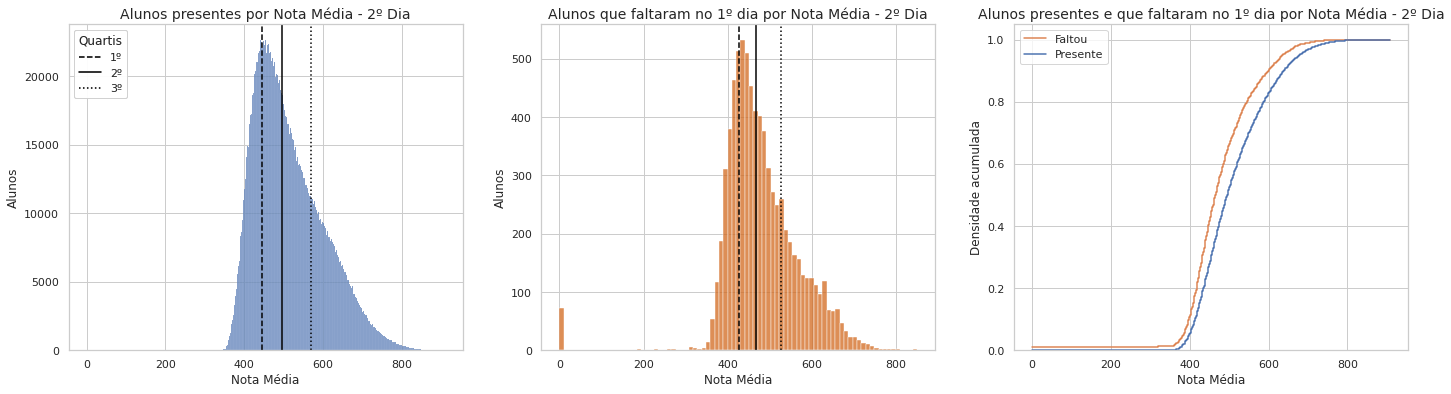

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, sharey=False, figsize=(24,6))

sns.histplot(data=dados.query('BOL_FALTA_QUALQUER == False'), x='NOTA_MEDIA_DIA_2', ax=ax0)
ax0.set_title('Alunos presentes por Nota Média - 2º Dia', fontsize=14)
ax0.set_xlabel('Nota Média')
ax0.set_ylabel('Alunos')

sns.histplot(data=dados.query('BOL_FALTA_2 == False & BOL_FALTA_1 == True'), x='NOTA_MEDIA_DIA_2', color='chocolate', ax=ax1)
ax1.set_title('Alunos que faltaram no 1º dia por Nota Média - 2º Dia', fontsize=14)
ax1.set_xlabel('Nota Média')
ax1.set_ylabel('Alunos')

sns.histplot(data=dados.query('BOL_FALTA_2 == False'), x="NOTA_MEDIA_DIA_2", hue="BOL_FALTA_1",
             element="step", fill=False, cumulative=True, stat="density", common_norm=False, ax=ax2)
ax2.set_title('Alunos presentes e que faltaram no 1º dia por Nota Média - 2º Dia', fontsize=14)
ax2.set_xlabel('Nota Média')
ax2.set_ylabel('Densidade acumulada')

ax0.axvline(dados.query('BOL_FALTA_QUALQUER == False')['NOTA_MEDIA_DIA_2'].quantile(.25), color='black', linestyle='--')
ax0.axvline(dados.query('BOL_FALTA_QUALQUER == False')['NOTA_MEDIA_DIA_2'].quantile(.5), color='black', linestyle='-')
ax0.axvline(dados.query('BOL_FALTA_QUALQUER == False')['NOTA_MEDIA_DIA_2'].quantile(.75), color='black', linestyle=':')

ax1.axvline(dados.query('BOL_FALTA_2 == False & BOL_FALTA_1 == True')['NOTA_MEDIA_DIA_2'].quantile(.25), color='black', linestyle='--')
ax1.axvline(dados.query('BOL_FALTA_2 == False & BOL_FALTA_1 == True')['NOTA_MEDIA_DIA_2'].quantile(.5), color='black', linestyle='-')
ax1.axvline(dados.query('BOL_FALTA_2 == False & BOL_FALTA_1 == True')['NOTA_MEDIA_DIA_2'].quantile(.75), color='black', linestyle=':')

legenda = ax0.legend(title='Quartis', loc='upper left', labels=['1º','2º','3º'])
ax0.add_artist(legenda)

plt.legend(title='', loc='upper left', labels=['Faltou','Presente'])

plt.show()

### Dados da Redação

Observando as Medidas de Tendência Central podemos concluir que as notas, tanto dos candidatos que faltaram quanto dos presentes, nos dois dias, mostram uma tendencia de *Assimetria à Direita*.
- Os candidatos que tiraram nota 0 parecem puxar a mediana para esquerda mesmo nos grupos com moda diferente de 0.
- Tendencia dos candidatos que faltaram de tirar uma nota menor que os presentes em todas as provas

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
media_dia1_faltante = dados.query('BOL_FALTA_2 == True & BOL_FALTA_1 == False')['NOTA_MEDIA_DIA_1']
media_dia1_presente = dados.query('BOL_FALTA_QUALQUER == False')['NOTA_MEDIA_DIA_1']
media_dia2_faltante = dados.query('BOL_FALTA_1 == True & BOL_FALTA_2 == False')['NOTA_MEDIA_DIA_2']
media_dia2_presente = dados.query('BOL_FALTA_QUALQUER == False')['NOTA_MEDIA_DIA_2']
media_redacao_faltante = dados.query('BOL_FALTA_2 == True & BOL_FALTA_1 == False')['NU_NOTA_REDACAO']
media_redacao_presente = dados.query('TP_STATUS_REDACAO != 0')['NU_NOTA_REDACAO']

notas = {
    'Presente 1': [media_dia1_presente.mean(),media_dia1_presente.median(),media_dia1_presente.mode().item(),media_dia1_presente.std(),media_dia1_presente.count()],
    'Faltante 1': [media_dia1_faltante.mean(),media_dia1_faltante.median(),media_dia1_faltante.mode().item(),media_dia1_faltante.std(),media_dia1_faltante.count()],
    'Presente 2': [media_dia2_presente.mean(),media_dia2_presente.median(),media_dia2_presente.mode().item(),media_dia2_presente.std(),media_dia2_presente.count()],
    'Faltante 2': [media_dia2_faltante.mean(),media_dia2_faltante.median(),media_dia2_faltante.mode().item(),media_dia2_faltante.std(),media_dia2_faltante.count()],
    'Presente R': [media_redacao_presente.mean(),media_redacao_presente.median(),media_redacao_presente.mode().item(),media_redacao_presente.std(),media_redacao_presente.count()],
    'Faltante R': [media_redacao_faltante.mean(),media_redacao_faltante.median(),media_redacao_faltante.mode().item(),media_redacao_faltante.std(),media_redacao_faltante.count()]
}
tipos = ['1º Dia','1º Dia','2º Dia','2º Dia','Redação','Redação']

notas_df = pd.DataFrame(notas, index=['Média','Mediana','Moda','Desvio Padrão','Candidatos'])
notas_df.columns = pd.MultiIndex.from_arrays([tipos, notas_df.columns])
notas_df

1º Dia                2º Dia               Redação  \
              Presente 1 Faltante 1 Presente 2 Faltante 2 Presente R   
Média             514.03     466.91     513.55     479.85     613.50   
Mediana           512.50     462.55     496.10     466.40     600.00   
Moda                0.00       0.00     460.00       0.00     560.00   
Desvio Padrão      80.76      87.01      87.51      90.85     190.71   
Candidatos    2238107.00  140272.00 2238107.00    7737.00 2378379.00   

                          
              Faltante R  
Média             469.17  
Mediana           520.00  
Moda                0.00  
Desvio Padrão     233.59  
Candidatos     140272.00

Na redação a diferença da nota entre alunos presentes em todas as provas com aqueles que faltaram é ainda maior.
- Redações com nota 0 proporcionalmente muito maior entre os alunos faltantes.

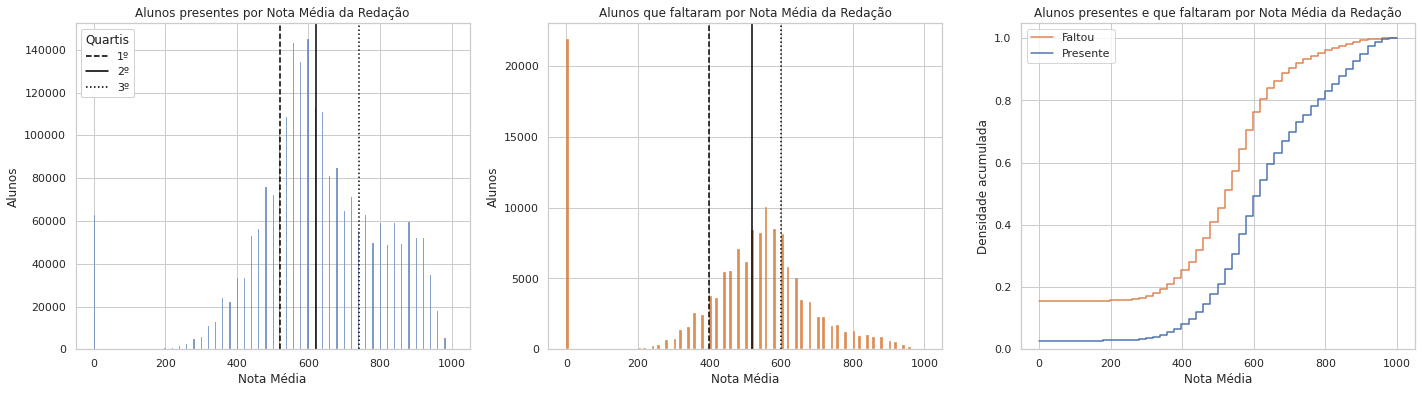

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, sharey=False, figsize=(24,6))

sns.histplot(data=dados.query('BOL_FALTA_QUALQUER == False'), x='NU_NOTA_REDACAO', ax=ax0)
ax0.set_title('Alunos presentes por Nota Média da Redação', fontsize=12)
ax0.set_xlabel('Nota Média')
ax0.set_ylabel('Alunos')

sns.histplot(data=dados.query('BOL_FALTA_2 == True & BOL_FALTA_1 == False'), x='NU_NOTA_REDACAO', color='chocolate', ax=ax1)
ax1.set_title('Alunos que faltaram por Nota Média da Redação', fontsize=12)
ax1.set_xlabel('Nota Média')
ax1.set_ylabel('Alunos')

sns.histplot(data=dados.query('BOL_FALTA_1 == False'), x="NU_NOTA_REDACAO", hue="BOL_FALTA_2",
             element="step", fill=False, cumulative=True, stat="density", common_norm=False, ax=ax2)
ax2.set_title('Alunos presentes e que faltaram por Nota Média da Redação', fontsize=12)
ax2.set_xlabel('Nota Média')
ax2.set_ylabel('Densidade acumulada')

ax0.axvline(dados.query('BOL_FALTA_QUALQUER == False')['NU_NOTA_REDACAO'].quantile(.25), color='black', linestyle='--')
ax0.axvline(dados.query('BOL_FALTA_QUALQUER == False')['NU_NOTA_REDACAO'].quantile(.5), color='black', linestyle='-')
ax0.axvline(dados.query('BOL_FALTA_QUALQUER == False')['NU_NOTA_REDACAO'].quantile(.75), color='black', linestyle=':')

ax1.axvline(dados.query('BOL_FALTA_2 == True & BOL_FALTA_1 == False')['NU_NOTA_REDACAO'].quantile(.25), color='black', linestyle='--')
ax1.axvline(dados.query('BOL_FALTA_2 == True & BOL_FALTA_1 == False')['NU_NOTA_REDACAO'].quantile(.5), color='black', linestyle='-')
ax1.axvline(dados.query('BOL_FALTA_2 == True & BOL_FALTA_1 == False')['NU_NOTA_REDACAO'].quantile(.75), color='black', linestyle=':')

legenda = ax0.legend(title='Quartis', loc='upper left', labels=['1º','2º','3º'])
ax0.add_artist(legenda)

plt.legend(title='', loc='upper left', labels=['Faltou','Presente'])

plt.show()

### Dados Socioeconômicos

Quando analisamos os homens responsáveis pelos candidatos:
- podemos observar tendencia em 'Nunca estudou' e 'Não completou a 4º série/5º ano do Ensino Fundamental' entre os candidatos que faltaram.
- e 'Completou o Ensino Médio, mas não completou a Faculdade ', 'Completou a Faculdade, mas não a Pós-graduação' e 'Completou a Pós-graduação' entre aqueles que copletaram todas as provas.

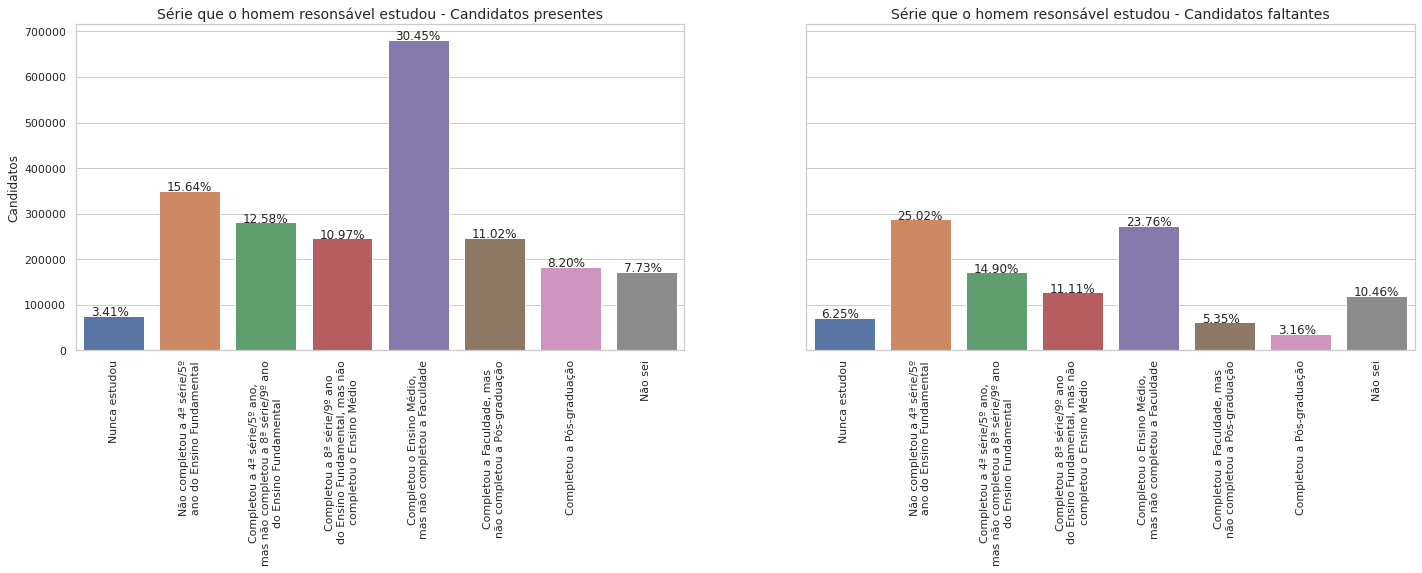

In [ ]:
labels = ['Nunca estudou','Não completou a 4ª série/5º\nano do Ensino Fundamental',
          'Completou a 4ª série/5º ano,\nmas não completou a 8ª série/9º ano\ndo Ensino Fundamental',
          'Completou a 8ª série/9º ano\ndo Ensino Fundamental, mas não\ncompletou o Ensino Médio',
          'Completou o Ensino Médio,\nmas não completou a Faculdade',
          'Completou a Faculdade, mas\nnão completou a Pós-graduação',
          'Completou a Pós-graduação','Não sei']
ordem = ['A','B','C','D','E','F','G','H']

fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True, figsize=(24,6))

sns.countplot(data=dados.query('BOL_FALTA_QUALQUER == False'), x='Q001', order=ordem, ax=ax0)
ax0.set_title('Série que o homem resonsável estudou - Candidatos presentes', fontsize=14)
ax0.set_xlabel('')
ax0.set_ylabel('Candidatos')
ax0.set_xticks(np.arange(8))
ax0.set_xticklabels(labels, rotation=90)
for p, label in zip(ax0.patches, dados.query('BOL_FALTA_QUALQUER == False')["Q001"].value_counts(normalize=True).sort_index().values):
    ax0.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.1, p.get_height()+0.2))

sns.countplot(data=dados.query('BOL_FALTA_QUALQUER == True'), x='Q001', order=ordem, ax=ax1)
ax1.set_title('Série que o homem resonsável estudou - Candidatos faltantes', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticks(np.arange(8))
ax1.set_xticklabels(labels, rotation=90)
for p, label in zip(ax1.patches, dados.query('BOL_FALTA_QUALQUER == True')["Q001"].value_counts(normalize=True).sort_index().values):
    ax1.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.1, p.get_height()+0.2))

plt.show()

Quando analisamos as mulheres responsáveis pelos candidatos:
- encontramos a mesma tendencia observada nos homens responsáveis pelos candidatos.

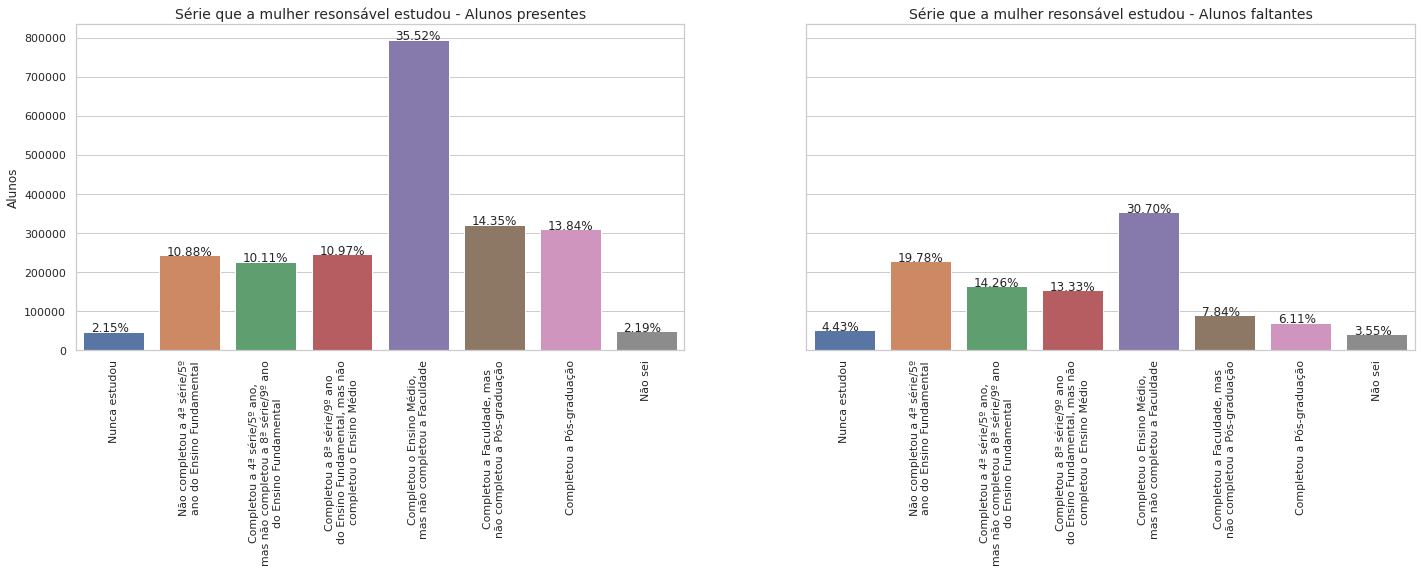

In [ ]:
labels = ['Nunca estudou','Não completou a 4ª série/5º\nano do Ensino Fundamental',
          'Completou a 4ª série/5º ano,\nmas não completou a 8ª série/9º ano\ndo Ensino Fundamental',
          'Completou a 8ª série/9º ano\ndo Ensino Fundamental, mas não\ncompletou o Ensino Médio',
          'Completou o Ensino Médio,\nmas não completou a Faculdade',
          'Completou a Faculdade, mas\nnão completou a Pós-graduação',
          'Completou a Pós-graduação','Não sei']
ordem = ['A','B','C','D','E','F','G','H']

fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True, figsize=(24,6))

sns.countplot(data=dados.query('BOL_FALTA_QUALQUER == False'), x='Q002', order=ordem, ax=ax0)
ax0.set_title('Série que a mulher resonsável estudou - Alunos presentes', fontsize=14)
ax0.set_xlabel('')
ax0.set_ylabel('Alunos')
ax0.set_xticks(np.arange(8))
ax0.set_xticklabels(labels, rotation=90)
for p, label in zip(ax0.patches, dados.query('BOL_FALTA_QUALQUER == False')["Q002"].value_counts(normalize=True).sort_index().values):
    ax0.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.1, p.get_height()+0.2))

sns.countplot(data=dados.query('BOL_FALTA_QUALQUER == True'), x='Q002', order=ordem, ax=ax1)
ax1.set_title('Série que a mulher resonsável estudou - Alunos faltantes', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticks(np.arange(8))
ax1.set_xticklabels(labels, rotation=90)
for p, label in zip(ax1.patches, dados.query('BOL_FALTA_QUALQUER == True')["Q002"].value_counts(normalize=True).sort_index().values):
    ax1.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.1, p.get_height()+0.2))

plt.show()

Observado o número de pessoas que moram na residência não existe um padrão diferente significativo para cada grupo, mas é possível notar:
- candidatos que faltaram com tendência de morar sozinho ou com 2 pessoas.
- candidatos que realizaram todas as provas grande vantagem em residências de 4 pessoas.

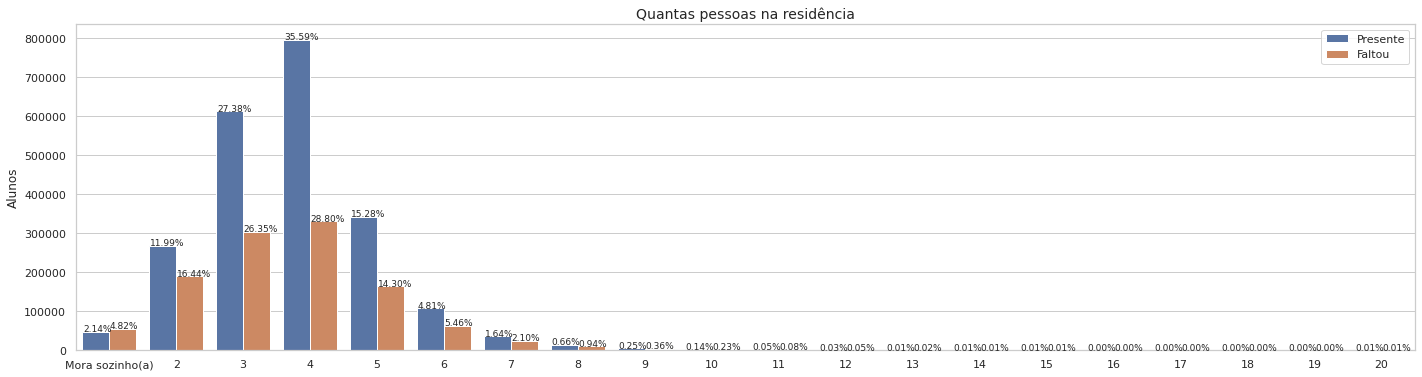

In [ ]:
labels = ['Mora sozinho(a)','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
fig, ax = plt.subplots(figsize=(24,6))

ax = sns.countplot(data=dados, x='Q005', hue='BOL_FALTA_QUALQUER', order=dados["Q005"].value_counts().sort_index().index)
ax.set_title('Quantas pessoas na residência', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Alunos')
ax.set_xticks(np.arange(20))
ax.set_xticklabels(labels)
for p, label in zip(ax.patches, dados.groupby(['BOL_FALTA_QUALQUER'])["Q005"].value_counts(normalize=True).sort_index().values):
    ax.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.01, p.get_height()+0.3), fontsize=9)
    
plt.legend(title='', loc='upper right', labels=['Presente', 'Faltou'])
plt.show()

Apesar de não apresentar muitas diferenças entre o número de pessoas que moram na residencia do candidato, as diferenças entre Renda mensal familiar é considerável.
- proporcionalmente os alunos que faltaram tem 16% de superioridade na faixa salarial de até 1.650,00 reias
- alunos presentes em todas as provas com vantagem a partir de 2.200,01 reais

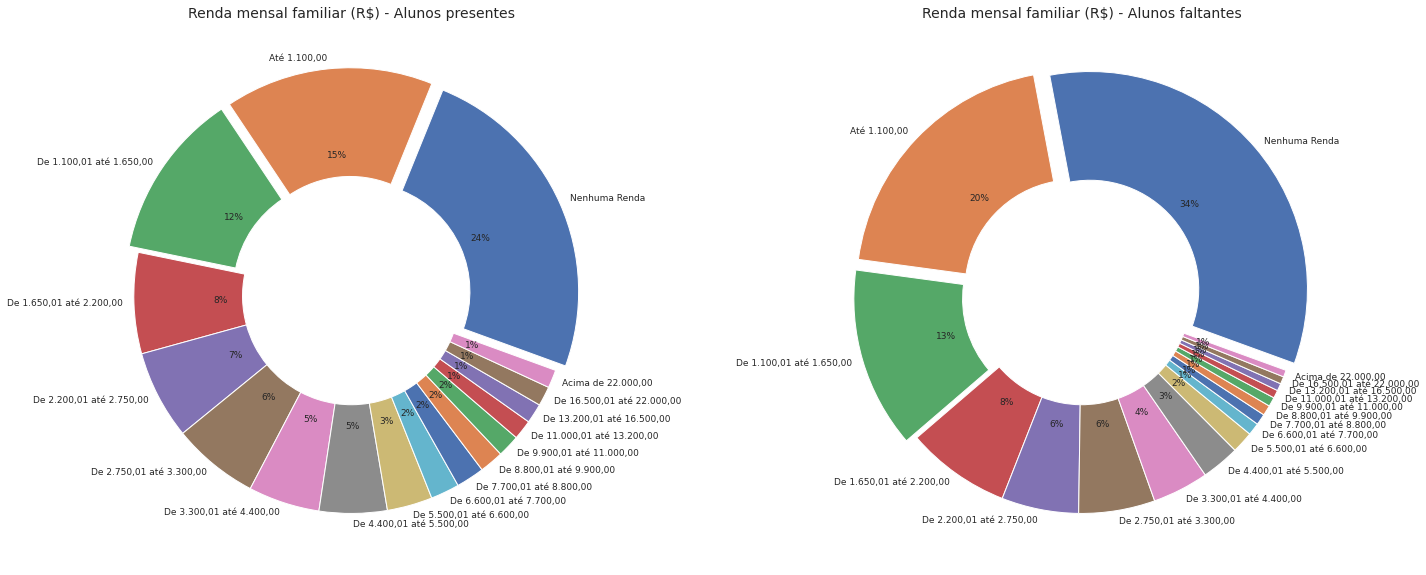

In [ ]:
labels = ['Nenhuma Renda','Até 1.100,00','De 1.100,01 até 1.650,00','De 1.650,01 até 2.200,00',
          'De 2.200,01 até 2.750,00','De 2.750,01 até 3.300,00','De 3.300,01 até 4.400,00',
          'De 4.400,01 até 5.500,00','De 5.500,01 até 6.600,00','De 6.600,01 até 7.700,00',
          'De 7.700,01 até 8.800,00','De 8.800,01 até 9.900,00','De 9.900,01 até 11.000,00',
          'De 11.000,01 até 13.200,00','De 13.200,01 até 16.500,00','De 16.500,01 até 22.000,00',
          'Acima de 22.000,00']
explode = (0.05, 0.05, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(24,10))

ax0.pie(x=dados.query('BOL_FALTA_QUALQUER == False')['Q006'].value_counts(), labels=labels, autopct='%.0f%%', explode=explode, 
        labeldistance=1.05, wedgeprops=dict(width=0.5), startangle=-20, textprops={'fontsize': 9})
ax0.set_title('Renda mensal familiar (R$) - Alunos presentes', fontsize=14)

ax1.pie(x=dados.query('BOL_FALTA_QUALQUER == True')['Q006'].value_counts(), labels=labels, autopct='%.0f%%', explode=explode,
        labeldistance=1.05, wedgeprops=dict(width=0.5), startangle=-20, textprops={'fontsize': 9})
ax1.set_title('Renda mensal familiar (R$) - Alunos faltantes', fontsize=14)

plt.show()

Notavel tendencia dos alunos que faltaram terem de 0 até 2 celulares na residência.<br>
Enquanto os presentes dominam de três à quatro ou mais.

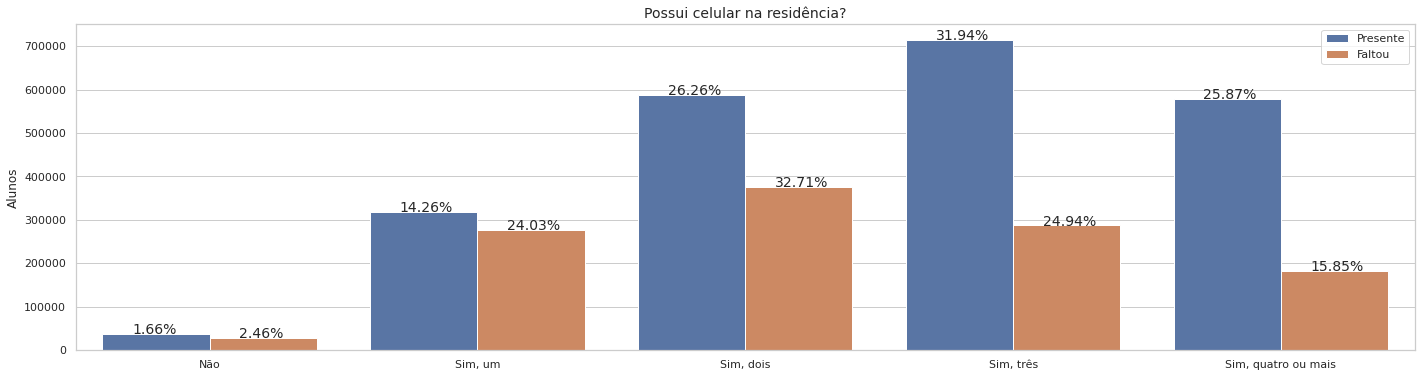

In [ ]:
labels = ['Não','Sim, um','Sim, dois','Sim, três','Sim, quatro ou mais']
fig, ax = plt.subplots(figsize=(24,6))

ax = sns.countplot(data=dados, x='Q022', hue='BOL_FALTA_QUALQUER', order=dados["Q022"].value_counts().sort_index().index)
ax.set_title('Possui celular na residência?', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Alunos')
ax.set_xticks(np.arange(5))
ax.set_xticklabels(labels)
for p, label in zip(ax.patches, dados.groupby(['BOL_FALTA_QUALQUER'])["Q022"].value_counts(normalize=True).sort_index().values):
    ax.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.11, p.get_height()+0.3), fontsize=14)
    
plt.legend(title='', loc='upper right', labels=['Presente', 'Faltou'])
plt.show()

- Mais da metade dos alunos faltantes não tem computador da residência.
- 62,79% dos alunos presentes tem pelo menos um computador.

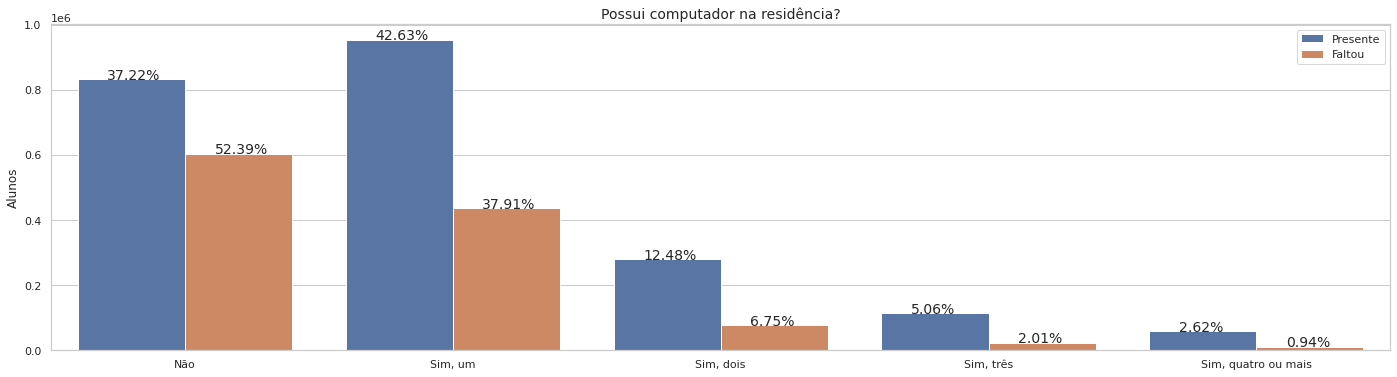

In [ ]:
labels = ['Não','Sim, um','Sim, dois','Sim, três','Sim, quatro ou mais']
fig, ax = plt.subplots(figsize=(24,6))

ax = sns.countplot(data=dados, x='Q024', hue='BOL_FALTA_QUALQUER', order=dados["Q024"].value_counts().sort_index().index)
ax.set_title('Possui computador na residência?', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Alunos')
ax.set_xticks(np.arange(5))
ax.set_xticklabels(labels)
for p, label in zip(ax.patches, dados.groupby(['BOL_FALTA_QUALQUER'])["Q024"].value_counts(normalize=True).sort_index().values):
    ax.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.11, p.get_height()+0.3), fontsize=14)
    
plt.legend(title='', loc='upper right', labels=['Presente', 'Faltou'])
plt.show()

Leve tendencia entre os alunos faltantes de não ter acesso à internet

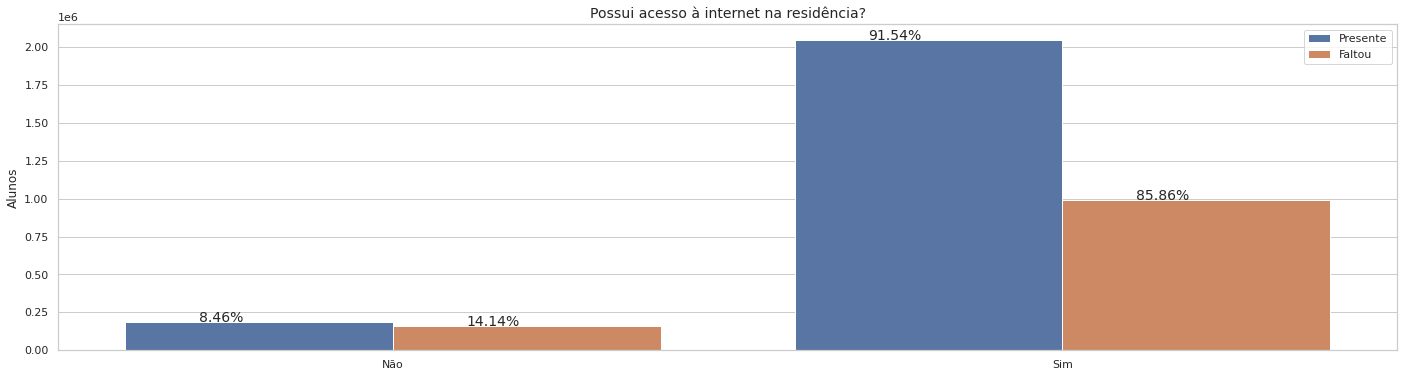

In [ ]:
labels = ['Não','Sim']
fig, ax = plt.subplots(figsize=(24,6))

ax = sns.countplot(data=dados, x='Q025', hue='BOL_FALTA_QUALQUER', order=dados["Q025"].value_counts().sort_index().index)
ax.set_title('Possui acesso à internet na residência?', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Alunos')
ax.set_xticks(np.arange(2))
ax.set_xticklabels(labels)
for p, label in zip(ax.patches, dados.groupby(['BOL_FALTA_QUALQUER'])["Q025"].value_counts(normalize=True).sort_index().values):
    ax.annotate('{:.2f}%'.format(100 * label), (p.get_x()+0.11, p.get_height()+0.3), fontsize=14)
    
plt.legend(title='', loc='upper right', labels=['Presente', 'Faltou'])
plt.show()

### Cruzando informações

Quando calculamos os valores máximos, médios e medianos das notas no primeiro dia de prova divididos pela Renda familiar e pelo alunos presentes em todas as provas e aqueles que faltaram no segundo dia, observamos que:
- Os valores máximos parecem não sofrer influencia da renda familiar, mas a diferença entre aqueles que faltaram e presentes é considerável principalmente no segundo dia de prova.
- As médias apresentam uma constante crescente a partir do aumento da renda familiar, uma menor diferença entre alunos que faltaram e presentes comparado aos máximos.
- No primeiro dia a mediana fica pouco acima da média, diferente do segundo quando fica um pouco abaixo. A tendencia de aumentar a nota com uma renda familiar maior continua na mediana também.

In [ ]:
labels = {'A':'Nenhuma Renda','B':'Até 1.100,00','C':'De 1.100,01 até 1.650,00','D':'De 1.650,01 até 2.200,00',
          'E':'De 2.200,01 até 2.750,00','F':'De 2.750,01 até 3.300,00','G':'De 3.300,01 até 4.400,00','H':'De 4.400,01 até 5.500,00',
          'I':'De 5.500,01 até 6.600,00','J':'De 6.600,01 até 7.700,00','K':'De 7.700,01 até 8.800,00','L':'De 8.800,01 até 9.900,00',
          'M':'De 9.900,01 até 11.000,00','N':'De 11.000,01 até 13.200,00','O':'De 13.200,01 até 16.500,00','P':'De 16.500,01 até 22.000,00',
          'Q':'Acima de 22.000,00'}

notas_por_falta_e_renda1 = pd.crosstab(dados.Q006, 
                                      dados.BOL_FALTA_2, 
                                      values = dados.query('BOL_FALTA_1 == False')['NOTA_MEDIA_DIA_1'], 
                                      aggfunc = {'mean', 'median', 'max'})
notas_por_falta_e_renda1.rename(index = labels, inplace = True)
notas_por_falta_e_renda1.rename(columns = {False:'Presente_D1', True:'Faltou_D1'}, inplace = True)


notas_por_falta_e_renda2 = pd.crosstab(dados.Q006, 
                                      dados.BOL_FALTA_1, 
                                      values = dados.query('BOL_FALTA_2 == False')['NOTA_MEDIA_DIA_2'], 
                                      aggfunc = {'mean', 'median', 'max'})
notas_por_falta_e_renda2.rename(index = labels, inplace = True)
notas_por_falta_e_renda2.rename(columns = {False:'Presente_D2', True:'Faltou_D2'}, inplace = True)

notas_por_falta_e_renda1.join(notas_por_falta_e_renda2)

max                  mean            \
BOL_FALTA_2                Presente_D1 Faltou_D1 Presente_D1 Faltou_D1   
Q006                                                                     
Nenhuma Renda                   755.55    720.80      463.05    435.89   
Até 1.100,00                    778.15    720.75      477.50    446.97   
De 1.100,01 até 1.650,00        827.05    740.00      499.60    462.11   
De 1.650,01 até 2.200,00        790.60    716.15      511.10    471.61   
De 2.200,01 até 2.750,00        778.05    755.50      521.68    477.19   
De 2.750,01 até 3.300,00        796.40    758.10      528.58    482.31   
De 3.300,01 até 4.400,00        791.15    727.05      538.96    488.71   
De 4.400,01 até 5.500,00        808.75    739.90      547.02    492.31   
De 5.500,01 até 6.600,00        787.65    737.50      553.49    498.68   
De 6.600,01 até 7.700,00        788.25    726.85      559.58    502.79   
De 7.700,01 até 8.800,00        791.75    745.70      562.35    502.83   
De 8.800,01 até 9.900,00        791.20    751.35      565.36    503.10   
De 9.900,01 até 11.000,00       795.55    734.00      568.92    508.62   
De 11.000,01 até 13.200,00      801.00    733.20      575.32    511.71   
De 13.200,01 até 16.500,00      792.90    721.95      579.42    515.75   
De 16.500,01 até 22.000,00      793.00    725.60      583.08    517.33   
Acima de 22.000,00              802.40    779.50      587.62    522.52   

                                median                   max            \
BOL_FALTA_2                Presente_D1 Faltou_D1 Presente_D2 Faltou_D2   
Q006                                                                     
Nenhuma Renda                   451.95    429.67      854.40    681.15   
Até 1.100,00                    469.95    440.50      904.85    716.90   
De 1.100,01 até 1.650,00        497.25    459.40      902.50    791.70   
De 1.650,01 até 2.200,00        510.75    470.90      893.35    784.90   
De 2.200,01 até 2.750,00        523.30    478.55      877.70    793.20   
De 2.750,01 até 3.300,00        531.60    483.77      895.40    808.30   
De 3.300,01 até 4.400,00        543.20    491.75      893.60    799.05   
De 4.400,01 até 5.500,00        551.55    497.30      890.55    779.85   
De 5.500,01 até 6.600,00        559.05    505.77      904.85    812.50   
De 6.600,01 até 7.700,00        565.80    510.48      875.05    769.05   
De 7.700,01 até 8.800,00        568.30    507.12      872.50    741.10   
De 8.800,01 até 9.900,00        571.70    513.85      901.05    739.75   
De 9.900,01 até 11.000,00       575.60    515.85      882.45    841.10   
De 11.000,01 até 13.200,00      582.23    519.00      886.30    751.75   
De 13.200,01 até 16.500,00      586.88    521.38      895.70    725.45   
De 16.500,01 até 22.000,00      590.55    530.25      904.85    799.10   
Acima de 22.000,00              595.35    532.25      907.95    850.10   

                                  mean                median            
BOL_FALTA_2                Presente_D2 Faltou_D2 Presente_D2 Faltou_D2  
Q006                                                                    
Nenhuma Renda                   459.80    434.46      447.65    429.75  
Até 1.100,00                    471.79    449.27      459.20    440.80  
De 1.100,01 até 1.650,00        492.34    468.62      479.35    456.90  
De 1.650,01 até 2.200,00        504.66    474.49      492.00    469.25  
De 2.200,01 até 2.750,00        518.83    488.82      507.30    485.25  
De 2.750,01 até 3.300,00        527.03    497.35      516.90    490.40  
De 3.300,01 até 4.400,00        541.34    515.88      533.85    500.80  
De 4.400,01 até 5.500,00        553.56    519.84      548.65    517.65  
De 5.500,01 até 6.600,00        562.78    527.24      559.15    526.35  
De 6.600,01 até 7.700,00        570.41    531.63      568.50    533.67  
De 7.700,01 até 8.800,00        575.67    527.81      575.05    539.75  
De 8.800,01 até 9.900,00        579.86    519.32   

# Formulação de hipoteses

---
**Há diferença entre o número de candidatos presentes em todas as provas e candidatos que faltaram em pelo menos 1 prova?**<br>

$N_{presentes} \Rightarrow$ número de candidatos presentes <br>
$N_{faltantes} \Rightarrow$ número de candidatos faltantes

$H_0: N_{faltantes} = N_{presentes}$ <br>
$H_1: N_{faltantes} \neq N_{presentes}$

In [ ]:
count = dados.query('BOL_FALTA_QUALQUER == True').shape[0]
nobs = dados.shape[0]
value = 0.5

stat, p = proportions_ztest(count, nobs, value, alternative='two-sided')

print("p_value: ",round(p,8))

p_value:  0.0


$H_0: N_{faltantes} \leq N_{presentes}$ <br>
$H_1: N_{faltantes} > N_{presentes}$

In [ ]:
stat, p = proportions_ztest(count, nobs, value, alternative='larger')
print("p_value: ",round(p,8))

p_value:  1.0


$H_0: N_{faltantes} \geq N_{presentes}$ <br>
$H_1: N_{faltantes} < N_{presentes}$

In [ ]:
stat, p = proportions_ztest(count, nobs, value, alternative='smaller')
print("p_value: ",round(p,8))

p_value:  0.0


1. No primeiro teste rejeitamos a $H_0$ e aceitamos $H_1$ de que há diferença no número de candidatos presentes e faltantes.
2. No segundo teste falhamos em rejeitar a hipótese nula, indicando que o número de candidatos faltantes é menor ou igual aos presentes
3. No último teste rejeitamos mais uma vez a $H_0$, concluindo que o número de candidatos faltantes é menor que os presentes em todas as provas.


---
**A proporção entre candidatos presentes em todas as provas e que faltaram em pelo menos 1 prova muda entre os grupos de idade?**<br>

$P_{presenca} \Rightarrow$ grupo dividido por presença na prova <br>
$P_{idade} \Rightarrow$ grupo dividido por idade

$H_0: P_{presenca}$ e $P_{idade}$ são independentes<br>
$H_1: P_{presenca}$ e $P_{idade}$ são dependentes

In [ ]:
tabela_contigencia = pd.crosstab(dados['BOL_FALTA_QUALQUER'], dados['TP_FAIXA_ETARIA'])
tabela_contigencia.rename(index={False: "Presente", True: "Faltante"}, inplace=True)
c, p, dof, expected = chi2_contingency(tabela_contigencia)
print("p_value: ",round(p,8))

p_value:  0.0


- Rejeitamos a hipótese nula e concluimos que os grupos referentes a presença dos alunos nas provas e idade estão associados.

---
**A proporção entre candidatos presentes em todas as provas e alunos que faltaram em pelo menos 1 prova muda dependendo do ano de conclusão do Ensino Médio?**<br>

$P_{presenca} \Rightarrow$ grupo dividido por presença na prova <br>
$P_{conclusão} \Rightarrow$ grupo dividido por ano de conclusão do EM

$H_0: P_{presenca}$ e $P_{conclusão}$ são independentes<br>
$H_1: P_{presenca}$ e $P_{conclusão}$ são dependentes

In [ ]:
tabela_contigencia = pd.crosstab(dados.query('TP_ANO_CONCLUIU > 0')['BOL_FALTA_QUALQUER'], dados.query('TP_ANO_CONCLUIU > 0')['TP_ANO_CONCLUIU'])
c, p, dof, expected = chi2_contingency(tabela_contigencia)
print("p_value: ",round(p,8))

p_value:  0.0


- $H_0$ rejeitada indicando que os grupos de presença nas provas e ano de conclusão do Ensino Médio são dependentes entre si.

---
**Existe diferença entre a média de nota entre candidatos presentes em todas as provas e candidatos que faltaram em pelo menos 1 prova?**<br>

$\mu_1 \Rightarrow$ média dos alunos presentes<br>
$\mu_2 \Rightarrow$ média dos alunos faltantes

$H_0:$ $\mu_2 - \mu_1 \geq = 0$ : Média dos alunos presentes é igual ou maior<br>
$H_1:$ $\mu_2 - \mu_1  <  0$ : Média dos alunos faltantes é menor

In [ ]:
def normal_dist(group):
  wval, pval = stats.shapiro(group)
  if len(group) > 5000:
    if wval <0.05: return False
    if pval < 0.05: return False
  return True
    
def variance(group1,group2):
  _,pval = stats.levene(group1,group2)
  if pval<0.05: return False
  return True

def stats_test_less(group1, group2):
  if normal_dist(group1) and normal_dist(group2):
    if variance(group1,group2):
      return stats.ttest_ind(group1,group2)
    return stats.ttest_ind(group1,group2, equal_var = False)
  return mannwhitneyu(group1,group2, alternative='less')

In [ ]:
print('Provas do 1º dia')
stats_test_less(dados.query('BOL_FALTA_1 == False & BOL_FALTA_2 == True')['NOTA_MEDIA_DIA_1'], dados.query('BOL_FALTA_QUALQUER == False')['NOTA_MEDIA_DIA_1'])

Provas do 1º dia


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


MannwhitneyuResult(statistic=108962460663.5, pvalue=0.0)

In [ ]:
print('Provas do 2º dia')
stats_test_less(dados.query('BOL_FALTA_2 == False & BOL_FALTA_1 == True')['NOTA_MEDIA_DIA_2'], dados.query('BOL_FALTA_QUALQUER == False')['NOTA_MEDIA_DIA_2'])

Provas do 2º dia


MannwhitneyuResult(statistic=6885948283.0, pvalue=4.7310976517395696e-213)

In [ ]:
print('Redação')
stats_test_less(dados.query('BOL_FALTA_1 == False & BOL_FALTA_2 == True')['NU_NOTA_REDACAO'], dados.query('BOL_FALTA_QUALQUER == False')['NU_NOTA_REDACAO'])

Redação


MannwhitneyuResult(statistic=95232480764.0, pvalue=0.0)

  $H_0$ rejeitada para todos os teste. Seja nas provas dos dois dias ou seja na redação, as notas dos candidatos faltantes é menor que dos presentes.

# Conclusão

Os dados indicam que existe caracteristicas que ajudam a definir esse grupo de candidatos que faltaram e diferencia-los dos presentes em todas as provas.

É possível perceber facilmente fatores que diferenciam esses grupos nas informações pessoais, do local da aplicação da prova e principalmente nas informações socioeconomicas. Mas não é tão simples determinar o que é correlação e o que é causalidade.

As desigualdades sociais tem grande influência na qualidade da educação que a população tem acesso. 


```
"Dados do Programa Internacional de Avaliação de Estudantes mostram que, em todas as provas, o grupo de 
brasileiros entre os 33% dos alunos de todo o mundo com nível socieconômico mais alto teve nota média mais 
de 100 pontos acima dos 33% de alunos com nível socioeconômico mais baixo."

https://g1.globo.com/educacao/noticia/2019/12/19/desigualdade-entre-alunos-ricos-e-pobres-no-brasil-esta-entre-as-maiores-do-mundo-diz-estudo.ghtml
```

Os 34% de abstenção do Enem 2021 chamam atenção, apesar de seu ano anterior ter marcado recorde histórico de abstenção com mais de 55% de abstenções. Não podemos deixar de lado todos os problemas relacionados à pandemia de COVID-19. 

A prova de 2020 ocorreu em meio a disseminação da COVID-19 que estava com o número de casos em crescimento e muitas incertezas em relação ao cronograma de vacinação. Já em 2021 o cenário era bem mais animador, com o avanço da vacinação, mas ainda assim não foi um evento normal, com os candidatos tendo que lidar com o medo de infecção ela COVID-19 durante as provas e a adaptação perante as regras sanitárias adotadas na pandemia.


- Analisando a **faixa etária** dos candidatos é possível perceber que o grupo que realizou todas as provas tem sua grande maioria (75%) entre 18 e 21 anos, já os participantes que faltaram em pelo menos 1 prova ficam entre 19 e 31 à 35 anos.
- No quesito **cor/raça** enquanto os brancos constitui 44% dos alunos presentes, nos faltantes o domínio é dos pardos com 47%.
- Quando olhamos para os dados de aplicação da prova é possível observar que a **Unidade da Federação** da escola em que o candidato realizou foi inscrito também é determinante, os candidatos presentes com maior tendência nas regiões Nordeste, Sul, Sudeste e Distrito Federal com destaque para o estado do Maranhão, já os que faltaram em pelo menos uma prova com maior tendência no Norte e Centro-Oeste com grande destaque para o estado do Amazonas com mais de 50% de abstenção.
- Nos dados sócioeconômicos é nítida a diferença entre a **escolaridade dos homens responsáveis** dos candidatos, com maioria proporcional os faltantes ficam entre *nunca estoudou* até *completou até a 4ª série/5º ano* enquanto os presentes com vantagem proporcional nas categorias *completou o Ensino Médio mas não a faculdade* até *completou a pós-graduação*.
- Quando comparamos a **renda mensal da família** percebemos que 54% dos candidatos faltantes tem renda de apenas até R$ 1.100,00, nos presentes essa faixa representa 39%.
- Em relação as notas das provas a diferença também é considerável, com os candidatos que faltaram em pelo menos uma tendo uma nota abaixo em ambos os dias. Na redação essa diferença aumenta ainda mais com muitas notas 0 entre os faltantes.

